# Predicción de la producción de energía eólica 
<span style="font-size: smaller;">Por Ana María Ortega Mateo (100472023) y Nathalia Moniz Cordova (100471979)</span>
<br>SEMILLA UTILIZADA EN ESTE NOTEBOOK 23

····················································································································································································································································
### EDA simplificado
- Determinar número de instancias.
- Determinar qué variables son categóricas y númericas.
- Valores faltantes (missing values).
    - Qué variables los tienen.
- Identificar si hay columnas constantes.
-Identificar correlaciones.
- Clasificación del problema (regresión o clasificación).
-Ver la distribución de la variable respuesta energía.

····················································································································································································································································


----------------------------------------------------------------------------------------------------------------
## IMPORTS
----------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import time
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn import tree
import numpy as np
from sklearn.dummy import DummyRegressor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from scipy.stats import randint as sp_randint
from sklearn.inspection import permutation_importance
import multiprocessing
import warnings
warnings.filterwarnings('ignore')

····················································································································································································································································
Cargamos los datos en un data frame, solo hay que tener en cuenta los .13.impresión de las primeras 5 filas de la tabla.
····················································································································································································································································

In [2]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

# Eliminar todos los datos que no corresponden a la localización 13
wind_ava_13 = [col for col in wind_ava.columns if col == 'datetime' or col == 'energy' or col.endswith('.13')]
df_filtered = wind_ava[wind_ava_13]
df_filtered.head()

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


····················································································································································································································································
Ver cuantas intancias y atributos tiene la tabla.
····················································································································································································································································

In [3]:
print('The shape of the data table is:')
print('===============================')
print(df_filtered.shape)
# print(df_filtered.dtype)

The shape of the data table is:
(4748, 24)


························································································································································································································································
Hay 4748 instancias y 24 características
························································································································································································································································

····················································································································································································································································
Identificar los tipos de datos y si hay valores nulos.
····················································································································································································································································

In [4]:
print('The types of the attributes are:')
print('================================')
df_filtered.info()

print('How many missing values per attribute:')
print('======================================')
print(df_filtered.isnull().sum())

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64

····················································································································································································································································
Podemos observar que de los datos proporcionados (sólo la zona de Sotavento) no hay ninguna variable nula y todos los datos son de tipo float exceptuando la fecha que es un dato de tipo categórico
····················································································································································································································································

····················································································································································································································································
Vamos a comprobar si el atributo datetime es relevante para la predicción de la variable respuesta energía. Para ello, vamos a separar el datetime en año,mes, día y hora para ver su correlación con la energía y decidir si la vamos a utilizar.
····················································································································································································································································

In [5]:
df_filtered['datetime'] = pd.to_datetime(df_filtered['datetime'])

# Dividir datetime en año, mes y día.
df_filtered = df_filtered.copy()  
df_filtered['year'] = df_filtered['datetime'].dt.year
df_filtered['month'] = df_filtered['datetime'].dt.month
df_filtered['day'] = df_filtered['datetime'].dt.day
df_filtered['hour'] = df_filtered['datetime'].dt.hour

# Calcular la correlación entre las variables anteriores y la energía.
correlation_year = df_filtered['year'].corr(df_filtered['energy'])
correlation_month = df_filtered['month'].corr(df_filtered['energy'])
correlation_day = df_filtered['day'].corr(df_filtered['energy'])
correlation_hour = df_filtered['hour'].corr(df_filtered['energy'])

print("Correlación con el año:", correlation_year)
print("Correlación con el mes:", correlation_month)
print("Correlación con el día:", correlation_day)
print("Correlación con la hora:", correlation_hour)

Correlación con el año: 0.008026642747679181
Correlación con el mes: 0.03306451250749753
Correlación con el día: -0.008877587860880855
Correlación con la hora: -0.03396190263457653


····················································································································································································································································
Estos coeficientes de correlación indican que hay relaciones muy débiles entre el datetime y la variable de energía. A continuación, debido a la correlación tan baja que tiene la variable datetime con energy, y su separación en años, mes y dia y no tener una correlacion mayor a 0.034, hemos decido quitarla.
····················································································································································································································································

In [6]:
#Eliminar de la tabla los siguientes atributos.
df_filtered = df_filtered.drop('datetime', axis=1)
df_filtered =df_filtered.drop('year', axis = 1)
df_filtered = df_filtered.drop('hour',axis=1)
df_filtered = df_filtered.drop('month',axis=1)
df_filtered = df_filtered.drop('day', axis=1)

····················································································································································································································································
Cuántas veces aparece cada valor único en la columna 'energy'. Proporciona una visión rápida de la distribución de los valores en esa columna.
····················································································································································································································································

In [7]:
print(df_filtered['energy'].value_counts())

energy
0.02      24
0.01      19
0.05      10
0.04       9
0.03       8
          ..
567.24     1
875.05     1
536.59     1
594.15     1
867.07     1
Name: count, Length: 4543, dtype: int64


····················································································································································································································································
Ahora calculamos la varianza de cada atributo 
····················································································································································································································································

In [8]:
# Cálculo de la varianza de cada variable, para detectar atributos constantes.
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64'])
varianza = numeric_columns.var()
print(varianza)

energy        4.429323e+05
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


·······················································································································································································································································
Después de analizar la varianza de cada atributo, hemos decidido eliminar aquellos atributos cuya varianza sea menor que el 0.0000000000001 del atributo que tenga la mayor varianza.
·······················································································································································································································································

In [9]:
#Varianza con respecto al máximo.
porcentaje_umbral = 0.0000000000001  # Eliminar variables cuya varianza sea menos del 0.0000000000001% del máximo
umbral_varianza = varianza.max() * porcentaje_umbral
variables_a_eliminar = varianza[varianza< umbral_varianza].index.tolist()
print("Variables a eliminar:", variables_a_eliminar)
#Variables a eliminar: ['lai_lv.13', 'lai_hv.13', 'iews.13', 'inss.13', 'fsr.13', 'flsr.13']

Variables a eliminar: ['lai_lv.13', 'lai_hv.13', 'iews.13', 'inss.13', 'fsr.13', 'flsr.13']


····················································································································································································································································
Procedemos a mostrar las varianzas mediante una gráfica para tener una mejor visualización de las mismas.
····················································································································································································································································

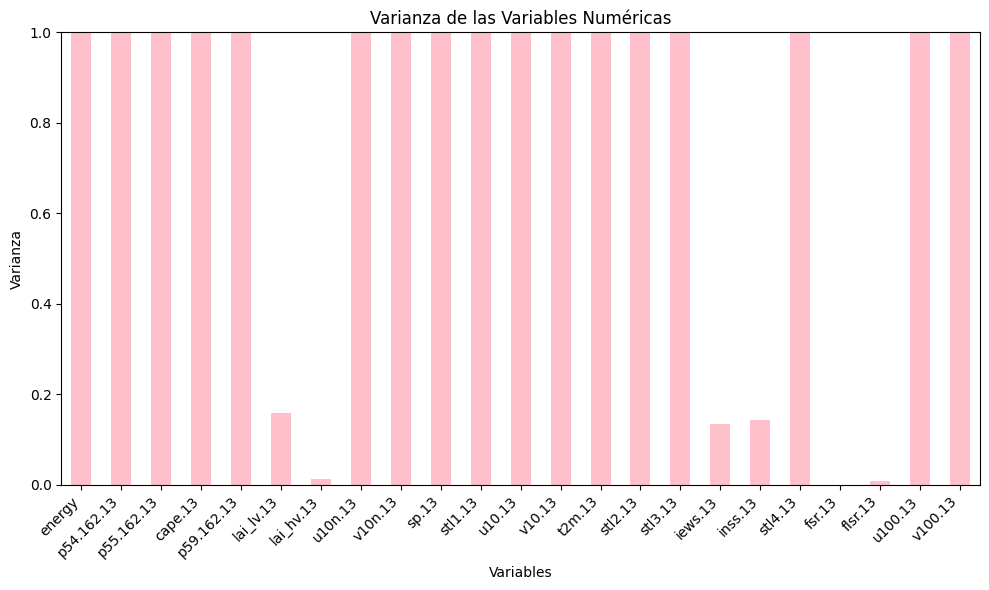

In [10]:

variance = df_filtered.select_dtypes(include=['float64', 'int64']).var()

# Creamos un gráfico de barras para visualizar las varianzas.
plt.figure(figsize=(10, 6))
variance.plot(kind='bar', color='pink')
plt.title('Varianza de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

·······················································································································································································································································
Los atribuots con poca varianza nos aportan poca informacion debido a que se acercan a ser constantes. Los atributos que según la gráfica tienen poca dispersión son lai_lv.13, lai_hv.13, iews.13, inss.13, fsr.13 y flsr.13 que tienen una varianza menor a 0.2 por lo que son prácticamente homogéneos y no aportan ningún tipo de información debido a que estas no varían por lo que decidimos eliminarlas. Como se puede ver, coinciden con los que eran menor que el umbral de varianza calculado anteriormente.
·······················································································································································································································································

·······················································································································································································································································
Una vez eliminados estos atributos el número de instancias y de características es:
·······················································································································································································································································

In [11]:
#Eliminamos las variables con poca varianza.
low_variance_columns = variance[variance < 0.2].index
df_filtered = df_filtered.drop(columns=low_variance_columns)
print(df_filtered.shape)

(4748, 17)


·······················································································································································································································································
Definimos X(X_df) e y Y(y_df) hacemos una impresión por filas de cada  dato de X y de Y.
······················································································································································································································································

In [12]:

y_df = df_filtered['energy'] #Variable respuesta es energía.
print(y_df)

X_df = df_filtered.drop('energy', axis=1)   

print(X_df)

0        402.71
1        696.80
2       1591.15
3       1338.62
4        562.50
         ...   
4743    1280.13
4744     855.00
4745     117.06
4746     516.96
4747     867.07
Name: energy, Length: 4748, dtype: float64
        p54.162.13  p55.162.13    cape.13    p59.162.13   u10n.13   v10n.13  \
0     2.510824e+06    9.186295  13.527577  1.386937e+06 -0.757587 -1.922799   
1     2.513173e+06    8.849569   6.896412  1.153526e+06 -1.412620 -1.403011   
2     2.509627e+06    7.924080   4.774439  1.098754e+06 -2.290185 -0.754580   
3     2.510571e+06    6.922709   0.000000  1.076021e+06 -3.497855  1.271028   
4     2.505664e+06    6.646282   0.000000  1.070830e+06 -0.971249  0.553060   
...            ...         ...        ...           ...       ...       ...   
4743  2.385772e+06   14.413342  24.971074  3.905586e+06  4.595786  5.563189   
4744  2.385708e+06   12.802883  60.248874  2.745694e+06  4.894838  5.577096   
4745  2.379049e+06   10.915997   3.145067  2.254171e+06  0.958361  0.9

·······················································································································································································································································
Este gráfico se utilizó para identificar en una gráfica las correlaciones entre los atributos, para que fuese más vistoso. Está comentada por el hecho de que tarda mucho(Abajo matriz correlación.)
·······················································································································································································································································

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,test_size=0.33, random_state= 23)

train_dataset = X_train.copy()
if "energy" not in train_dataset.columns:
    train_dataset.insert(0, "energy", y_train)
else:
    # Manejo de la situación cuando la columna "energy" ya existe
    pass


#TARDA MUCHO, YA SABEMOS VARIABLES CORRELADAS
#_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

·······················································································································································································································································
Variables correladas entre sí son u10n-u100-u10 y v10n-v100-v10
·······················································································································································································································································

·······················································································································································································································································
Otra forma de ver la correlación entre los atributos es a través de la matriz de correlación
·······················································································································································································································································

In [14]:
numeric_columns = df_filtered.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
#Imprimimos matriz de correlación.
print(correlation_matrix)

              energy  p54.162.13  p55.162.13   cape.13  p59.162.13   u10n.13  \
energy      1.000000   -0.239832    0.000785 -0.047995    0.446710  0.241616   
p54.162.13 -0.239832    1.000000    0.358850  0.076709   -0.402154 -0.291222   
p55.162.13  0.000785    0.358850    1.000000  0.275533    0.066936  0.287126   
cape.13    -0.047995    0.076709    0.275533  1.000000    0.003355  0.030579   
p59.162.13  0.446710   -0.402154    0.066936  0.003355    1.000000  0.549388   
u10n.13     0.241616   -0.291222    0.287126  0.030579    0.549388  1.000000   
v10n.13     0.310246   -0.268769    0.239527  0.004093    0.349320  0.589179   
sp.13      -0.191786    0.495013   -0.265860 -0.146495   -0.305721 -0.342025   
stl1.13    -0.197850    0.723378    0.564382  0.233210   -0.246174 -0.057948   
u10.13      0.244619   -0.285728    0.304594  0.033782    0.558743  0.994313   
v10.13      0.301370   -0.264359    0.238206  0.004071    0.341427  0.581812   
t2m.13     -0.161310    0.683013    0.58

·······················································································································································································································································
Ver la correlación que tiene cada atributo con la variable de respuesta(energy).
·······················································································································································································································································

In [15]:
#Datos correlados con la energía, rango [-1,0,1]---> Cerca de cero POCO CORRELADOS
correlation_matrix = df_filtered.corr()
correlation_with_energy = correlation_matrix['energy']
print(correlation_with_energy)
#Variable poco correlada, posible eliminación p55.162.13------>0.000785

energy        1.000000
p54.162.13   -0.239832
p55.162.13    0.000785
cape.13      -0.047995
p59.162.13    0.446710
u10n.13       0.241616
v10n.13       0.310246
sp.13        -0.191786
stl1.13      -0.197850
u10.13        0.244619
v10.13        0.301370
t2m.13       -0.161310
stl2.13      -0.192833
stl3.13      -0.165994
stl4.13      -0.046865
u100.13       0.236615
v100.13       0.302290
Name: energy, dtype: float64


·······················································································································································································································································
Como podemos ver p55.162.13 esta muy poco correlada con la variable respuesta, lo que podría significar que eliminarla no supondría ningun cambio en los resultados de los modelos y mejoraría el rendimiento. Como no se nos pide en esta práctica eliminación de atributos no importantes la vamos a dejar.
·······················································································································································································································································

·······················································································································································································································································
Ahora, pasaremos a analizar la naturaleza variable respuesta para determinar si el problema propuesto es un problema de regresión o clasificación, viendo su distribución y los distintos valores que toma.
·······················································································································································································································································

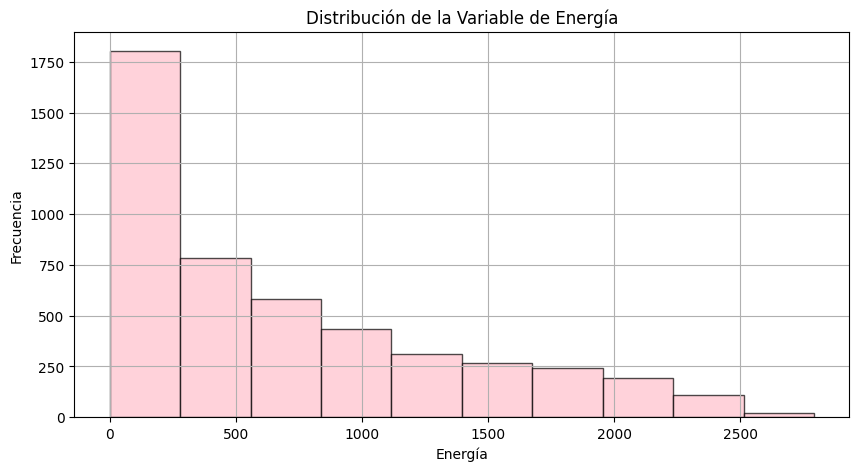

In [16]:

#Dibujar gráfica.
plt.figure(figsize=(10, 5))
plt.hist(df_filtered['energy'], bins=10, color='pink',edgecolor='black', alpha=0.7)
plt.title('Distribución de la Variable de Energía')
plt.xlabel('Energía')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

·······················································································································································································································································
Debido a todo el análisis anterior y sabiendo que nuestra variable de respuesta es númerica, es decir, continua y que puede tomar una amplia gama de valores (de 0 a 2500+) podemos decir que es un problema de REGRESIÓN. Se puede observar que tiene una tendencia decrenciente debido a la concentración de la frecuencia en números más bajos. Esta sesgada hacia la derecha (positivo).
·······················································································································································································································································

---------------------------------------------------------------------------------------------------------------
## Evaluación outer y evaluación inner 
---------------------------------------------------------------------------------------------------------------

·······················································································································································································································································
Considerando que nuestros datos son numéricos, utilizaremos las métricas R^2 (coeficiente de determinación) y RMSE (Root Mean Squared Error) para evaluar el rendimiento de nuestros modelos y realizar la evaluación outer(estimación de rendimiento futuro ). Para la búsqueda de hiperparámetros, optaremos por el método de búsqueda aleatoria (Randomized Search), aunque a veces si el modelo no tarda mucho, utilizaremos GridSearch porque prueba todas las combinaciones. Utilizaremos validación cruzada o holdout (inner), para poder comparar diferentes alternativas y ajustar hiper-parámetros.
·······················································································································································································································································

·······················································································································································································································································
Antes de evaluar ningún modelo procederemos a evaluar el modelo trivial dummy (media) que es el modelo más simple y ver el error que se comete. Lo compararemos junto con un arbol de decisión, para poder vevr el contraste.
·······················································································································································································································································

---------------------------------------------------------------------------------------------------------------
### DUMMY
---------------------------------------------------------------------------------------------------------------

··························································································································································································································································
Realizamos un árbol de decisión para poder compararlo con el modelo dummy. El modelo dummy es una técnica de referencia simple que se utiliza para establecer un punto de comparación básico cogiendo la media de la variable respuesta. Cualquier otro modelo deberia superar los resultados de la evaluación outer del modelo dummy, sino se podría descartar directamente dicho modelo.
··························································································································································································································································

In [17]:
#  Definimos Train/test 
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)
#Realizamos un arbol de Decision, para posteriormente compararlo con dummy.
regr = tree.DecisionTreeRegressor()
np.random.seed(23) 
# Lo entrenamos.
regr.fit(X_train, y_train)
# Obtenemos las predicciones.
y_test_pred = regr.predict(X_test)
# Evaluación outer.
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")

RMSE of the tree: 509.2271533946039
R2 of the tree: 0.418550139531335


In [18]:
#Modelo dummy con la media.
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
#Evaluación outer.
rmse_mean_dummy = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))
r2_mean_dummy = metrics.r2_score(y_test, regr_mean.predict(X_test))
#Comparación e impresión.
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")
print(f"RMSE of dummy(mean): {rmse_mean_dummy}")
print(f"R2 of dummy(mean): {r2_mean_dummy}")
# AHora con la mediana.
regr_median_dummy = DummyRegressor(strategy="median")
regr_median_dummy.fit(X_train, y_train)
rmse_median_dummy = np.sqrt(metrics.mean_squared_error(y_test, regr_median_dummy.predict(X_test)))
r2_median_dummy = metrics.r2_score(y_test, regr_median_dummy.predict(X_test))

print(f"RMSE of dummy(median): {rmse_median_dummy}")
print(f"R2 of dummy(median): {r2_median_dummy}")

RMSE of the tree: 509.2271533946039
R2 of the tree: 0.418550139531335
RMSE of dummy(mean): 667.8623167010549
R2 of dummy(mean): -0.00014517274175895878
RMSE of dummy(median): 703.5561719926924
R2 of dummy(median): -0.10990732710352047


··························································································································································································································································
Al realizar el modelo dummy y compararlo con un árbol de regresión podemos observar que al ser un modelo que predice en función de la media o la mediana  de los valores de la variable de respuesta no es un modelo muy bueno, como anteriormente se ha explicado. 
··························································································································································································································································

-----------------------------------------------------------------------------------------------------------------
## DISTRIBUCIÓN Y MÉTODO DE ESCALADO
-----------------------------------------------------------------------------------------------------------------

··························································································································································································································································
Mostramos la distribución de cada variable por separado, para observar la distribución que tienen y así decidir que método de escalado utilizar.
··························································································································································································································································

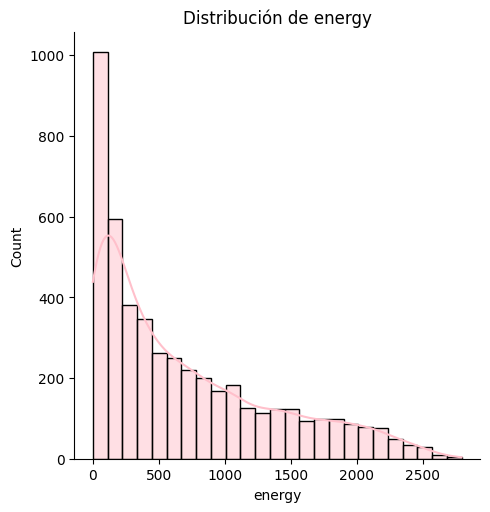

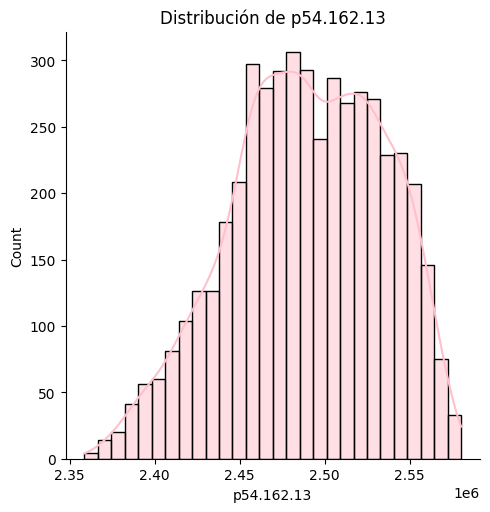

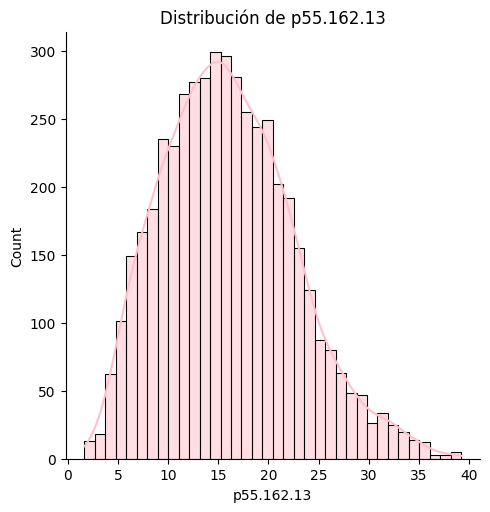

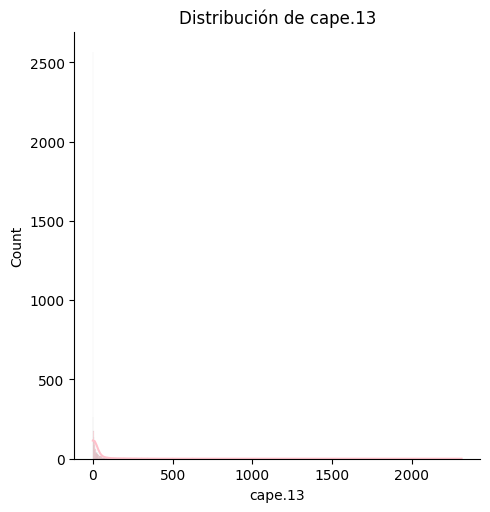

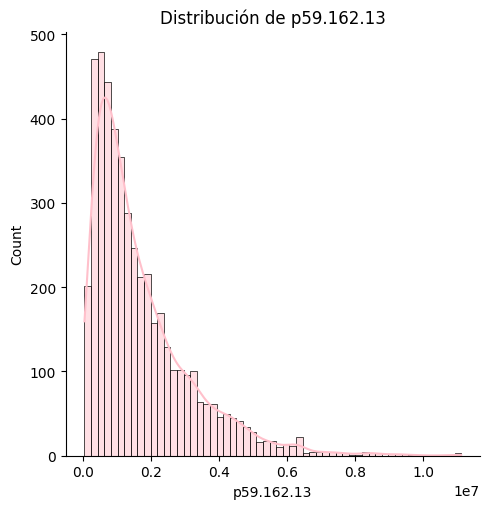

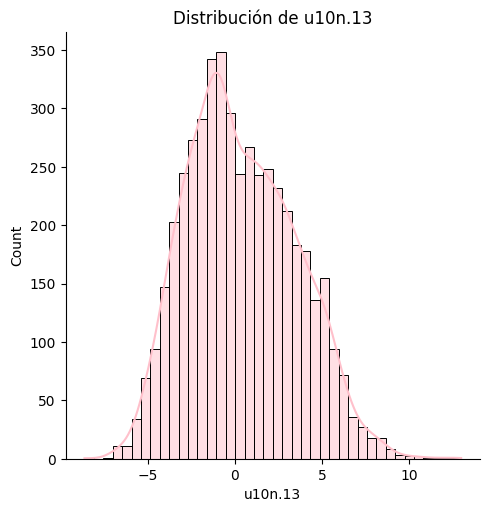

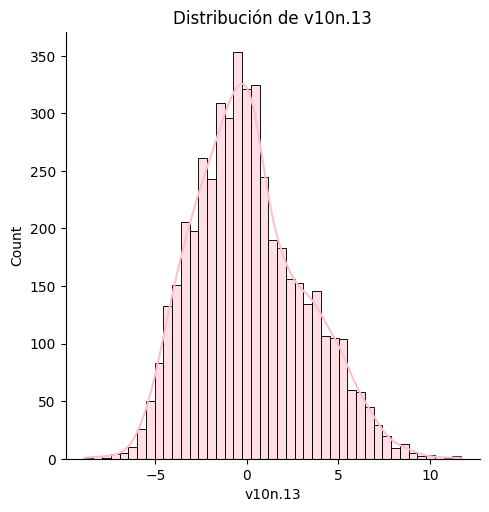

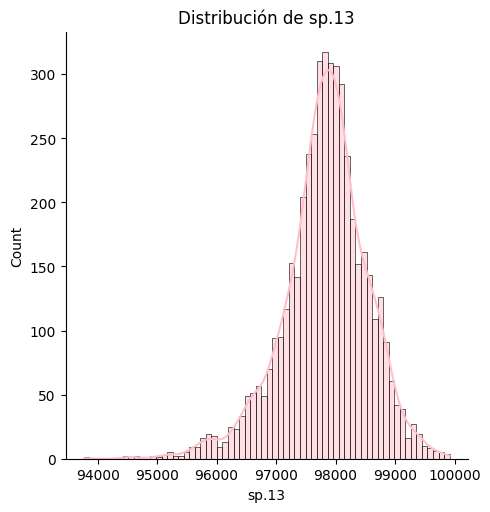

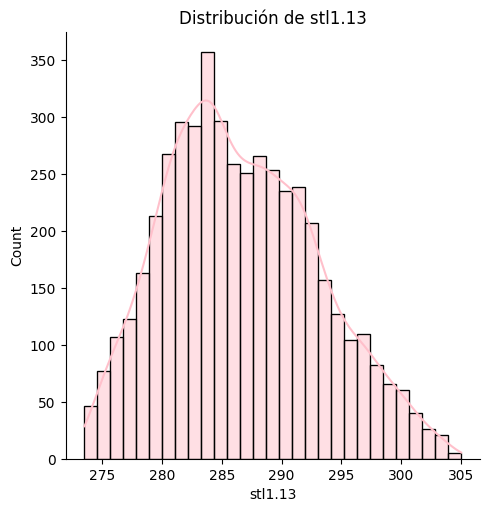

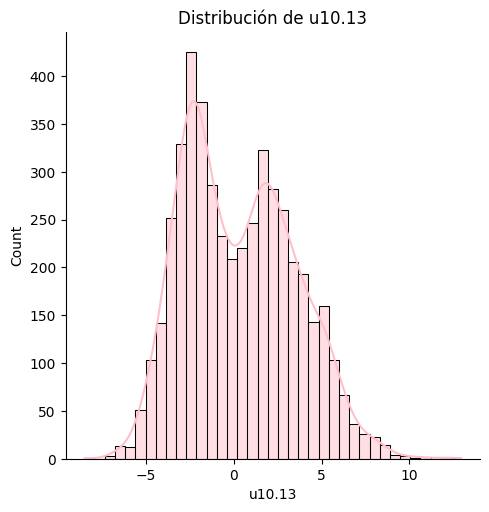

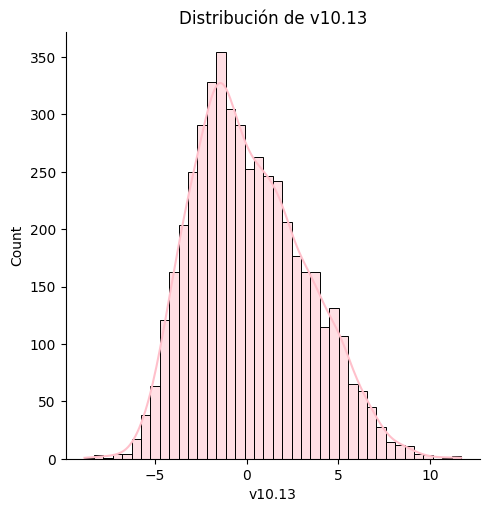

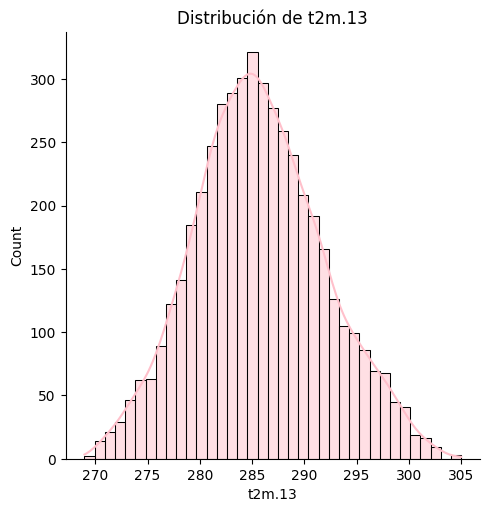

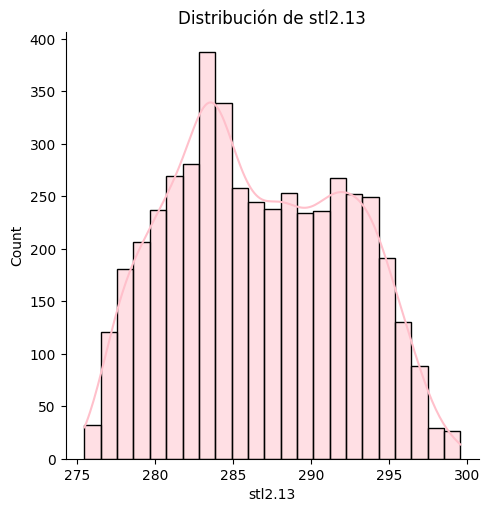

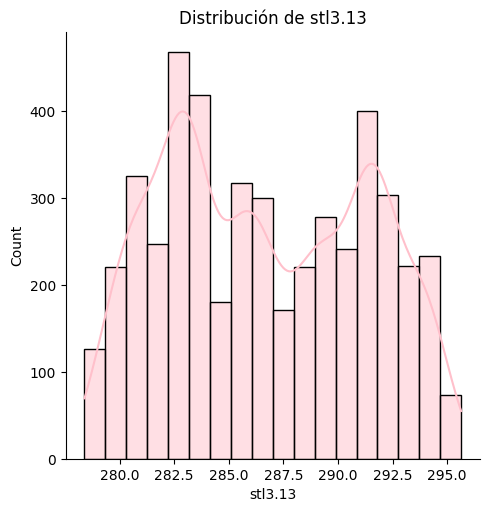

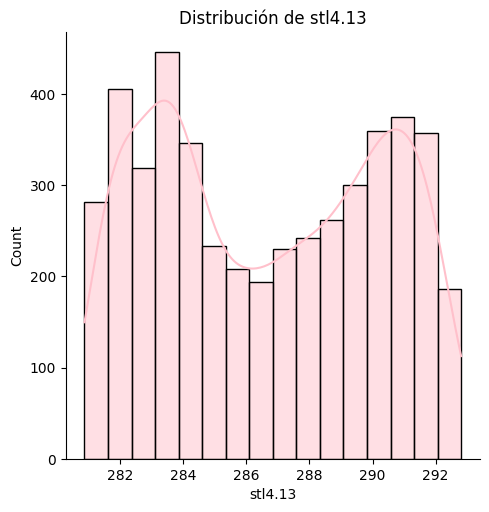

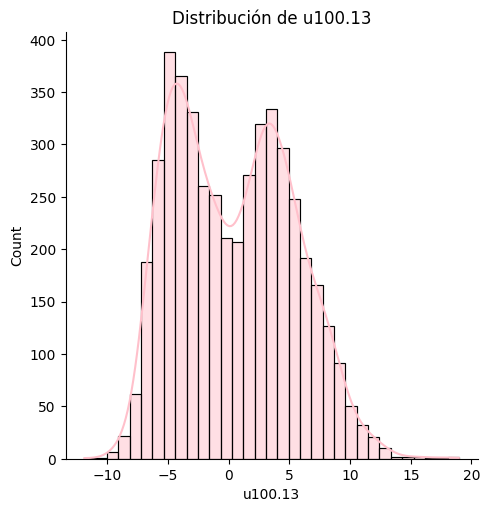

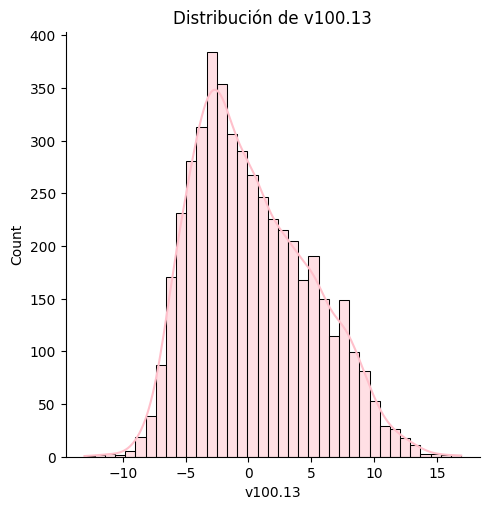

In [19]:
#Imprimimos gráfica de distribución de cada atributo.
for column in df_filtered.columns:
    sns.displot(df_filtered[column], kde=True, color='pink') #Rositaaa.
    plt.title(f'Distribución de {column}')
    plt.show()

 ··························································································································································································································································
 El escalado estándar transforma las características para que tengan una media de 0 y una desviación estándar de 1. Esto ayuda a preservar la forma general de la distribución original de los datos. Al observar que hay variables con distribuciones con sesgo y que varian mucho, hemos decidido por ello utilizar este método de escalado.El escalado estándar es menos sensible a los valores atípicos en comparación con otros métodos de escalado, como el escalado min-max.
 ··························································································································································································································································


----------------------------------------------------------------------------------------------------------------
## KNN
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································
Primero vamos a realizar el modelo KNN con sus parámetros por defecto sin utilizar ninguna optimización de hiperparámetros, para ver cuanto tarda y los parámetros de evaluación outer. Se utilizará el método de Standard Scaler para normalizar los datos. 
··························································································································································································································································

In [20]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)

# Inicializar modelos k-NN con el método escalado decidido.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y entrenar modelo k-NN
knn = KNeighborsRegressor()
start_time = time.time()
knn.fit(X_train_scaled, y_train)

# Predecir valores en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)  # Calcula la raíz cuadrada del MSE para obtener el RMSE
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
training_time_knn = time.time() - start_time

print("Tiempo de entrenamiento:", training_time_knn)
print(f" RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")
print("Tiempo de entrenamiento:", training_time_knn)
print("\n")


Tiempo de entrenamiento: 0.20282888412475586
 RMSE: 393.7886, R²: 0.6523
Tiempo de entrenamiento: 0.20282888412475586




··························································································································································································································································
Ahora vamos a realizar el KNN con búsqueda aleatoria ajustando los hiperparámetros mediante este método y compararlo con el modelo anterior. Los hiperparámetros que se van a ajustar son:<br>
-Número de vecinos.<br>
-Medida de ponderación de vecinos, distancia ponderada o no.<br>
-Algoritmo.<br>
-Parámetro p, cuando p es igual a 1, se utiliza la distancia de Manhattan, cuando p es igual a 2, se utiliza la distancia euclidiana.
··························································································································································································································································

In [35]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)

# Definir los parámetros para la búsqueda aleatoria
param_dist = {
    'n_neighbors': range(1, 21),  
    'weights': ['uniform', 'distance'], 
    'algorithm': ['hola'],  
    'p': [1, 2]  
}

# Inicializar y escalar atributos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNeighborsRegressor
knn = KNeighborsRegressor()

# Búsqueda de hiperparámetros con RandomizedSearch
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, random_state=23)

start_time = time.time()
random_search.fit(X_train_scaled, y_train)
training_time_random_search_knn = time.time() - start_time

# Mejor modelo encontrado por RandomizedSearchCV
best_model = random_search.best_estimator_

# Predecir valores en el conjunto de prueba con el mejor modelo
y_pred = best_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse_knn_random_search = mean_squared_error(y_test, y_pred)
rmse_knn_random_search = mean_squared_error(y_test, y_pred, squared=False)  # Calcula la raíz cuadrada del MSE para obtener el RMSE
mae_knn_random_search = mean_absolute_error(y_test, y_pred)
r2_knn_random_search = r2_score(y_test, y_pred)

# Imprimir métricas de rendimiento del mejor modelo
print("Tiempo de entrenamiento con búsqueda aleatoria de hiperparámetros:", training_time_random_search_knn)
print("Mejor modelo encontrado por RandomizedSearchCV: ", best_model)
print(f" RMSE: {rmse_knn_random_search:.4f}, R²: {r2_knn_random_search:.4f}")


ValueError: 
All the 250 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ana Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ana Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Ana Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ana Maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'algorithm' parameter of KNeighborsRegressor must be a str among {'auto', 'ball_tree', 'brute', 'kd_tree'}. Got 'hola' instead.


··························································································································································································································································
Se puede comparar con el modelo anterior y ver que haciendo un ajuste de hiperparámetros da mejores resultados de error en un tiempo de ejecución bastante rápido. Los hiperparámetros que ajustan mejor el modelo son:<br>
algorithm='ball_tree', n_neighbors=15(número de vecinos), p=1(Manhattan),weights='distance(ponderación)'.
··························································································································································································································································

-----------------------------------------------------------------------------------------------------------------
## MÉTODO DE REGRESIÓN LINEAL
-----------------------------------------------------------------------------------------------------------------

·····························································································································································································································································
REGRESIÓN LINEAL MÍNIMOS CUADRADOS
·····························································································································································································································································

··························································································································································································································································
Vamos primero a realizar la implementación del modelo y calcular el tiempo de ejecución, el RMSE y R2. También vamos a realizar dos gráficas para hacerlo más visible, una del valor estimado y el calculado y otra de la importancia que tienen los coeficientes con respecto al modelo lineal.
··························································································································································································································································

In [22]:
#Función de clase, dibujar gráficas
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Estimado')
  plt.plot(x, pred[:n], 'g^', label='Deseado')
  plt.legend(loc='upper right')
  plt.show()

··························································································································································································································································
A continuación calcularemos el modelo de regresión lineal  y utilizando el método de escalado StandardScaler.
··························································································································································································································································

In [23]:
#Separación de datos de test y entrenamento.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)

# Seleccionar las columnas numéricas. Aunque no esta datetime.
numerical_columns = X_train.select_dtypes(exclude="category").columns

# Preprocesamiento de datos: escalado de características numéricas
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),
)

# Definición del modelo de regresión lineal.
pipe_regr = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', LinearRegression())
])

# Medición del tiempo de entrenamiento
start_time = time.time()
np.random.seed(23)
pipe_regr.fit(X_train, y_train)
training_time_rgln = time.time() - start_time

print("Tiempo de entrenamiento:", training_time_rgln)

Tiempo de entrenamiento: 0.01225900650024414


RMSE de regresión lineal: 557.271 $/energy
Coeficiente de determinación R^2: 0.304


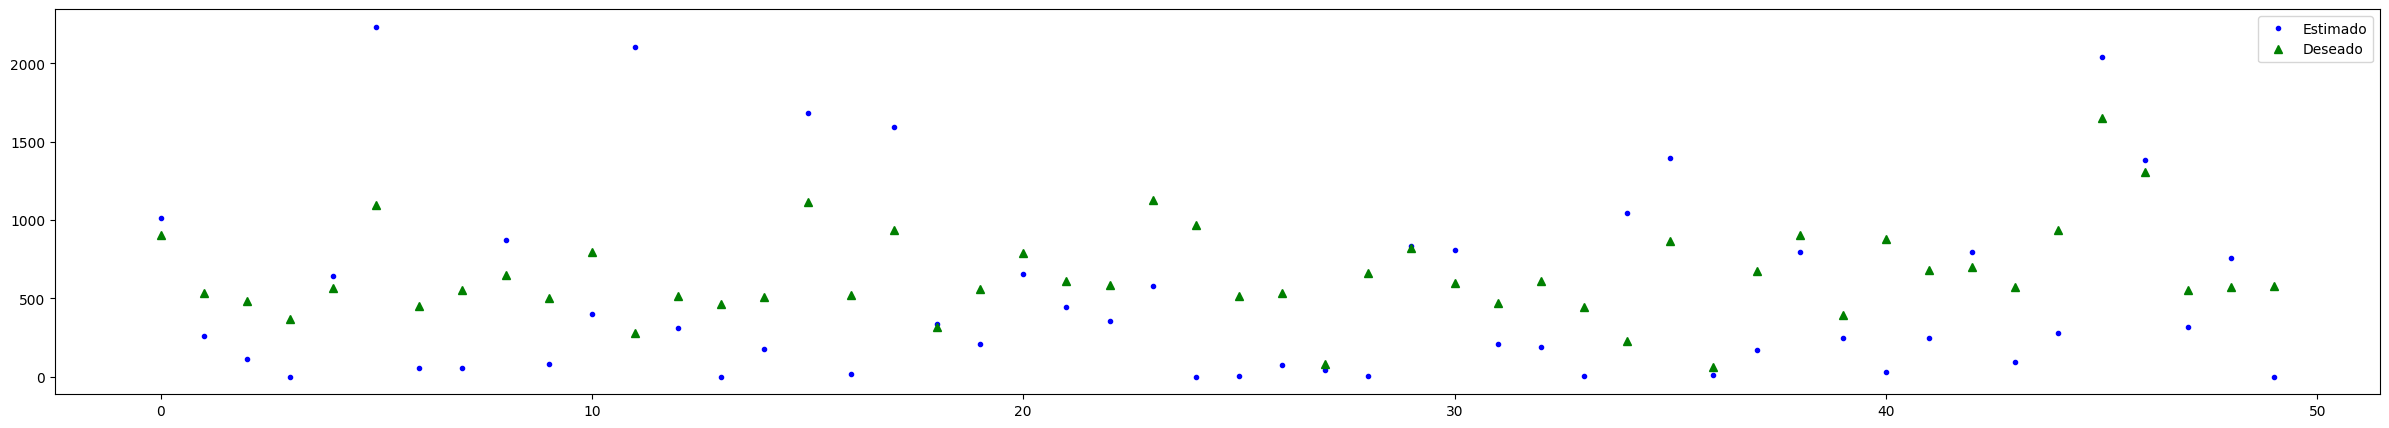

In [24]:
#Evaluación outer y gráfica de los primeros 50 de valor estimado y el deseado.
rmse_value_rgln = np.sqrt(mean_squared_error(y_test, pipe_regr.predict(X=X_test)))
r2_rgln = r2_score(y_test, pipe_regr.predict(X=X_test))

print(f"RMSE de regresión lineal: {rmse_value_rgln:.3f} $/energy")
print(f"Coeficiente de determinación R^2: {r2_rgln:.3f}")

# Visualización de los resultados
pintaResultados(pipe_regr, 50)

··························································································································································································································································
Tal y como se puede ver en la gráfica hay en varias situaciones que el valor estimado se separa mucho del deseado, lo que quiere decir que el modelo está cometiendo errores significativos a la hora de predecir los valores de energia.
··························································································································································································································································

··························································································································································································································································
A continuación, veremos los coeficientes más importantes para el modelo.
··························································································································································································································································

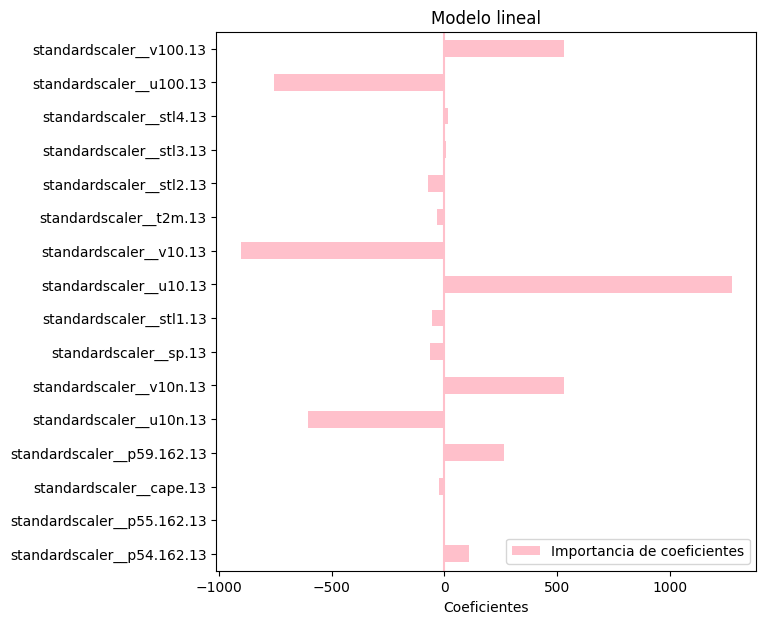

In [25]:
feature_names = pipe_regr[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regr['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7), color="pink")
plt.title("Modelo lineal")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color="pink")
plt.subplots_adjust(left=0.3)

··························································································································································································································································
Aun así el modelo de regresión lineal no da resultados muy buenos y puede ser porque los modelos de regresión lineal hacen una serie de suposiciones sobre los datos que hacen que los resultados de evaluación no sean los deseados. Como podemos observar los coeficientes más importantes son u10n,u10, u100, v10, v10n y v100 que justamente están correlados, lo cual tiene sentido de que sean todos importantes porque aportan información similar entre ellos.
··························································································································································································································································

----------------------------------------------------------------------------------------------------------------
### Ridge
----------------------------------------------------------------------------------------------------------------

··························································································································································································································································
Ahora vamos a utilizar el modelo de Ridge , que se utiliza en los modelos lineales para penalizar la complejidad del modelo y no ocurra overfitting.
··························································································································································································································································

In [26]:
# Creación y entrenamiento del modelo.
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=23)
pipe_regrRidge = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', RidgeCV(
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True
         ))
])

np.random.seed(23)
start_time = time.time()
pipe_regrRidge.fit(X_train, y_train)
training_time_ridge = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_ridge)

Tiempo de entrenamiento: 0.10635972023010254


RMSE de regresión lineal: 557.306 $/energy
Coeficiente de determinación R^2: 0.304


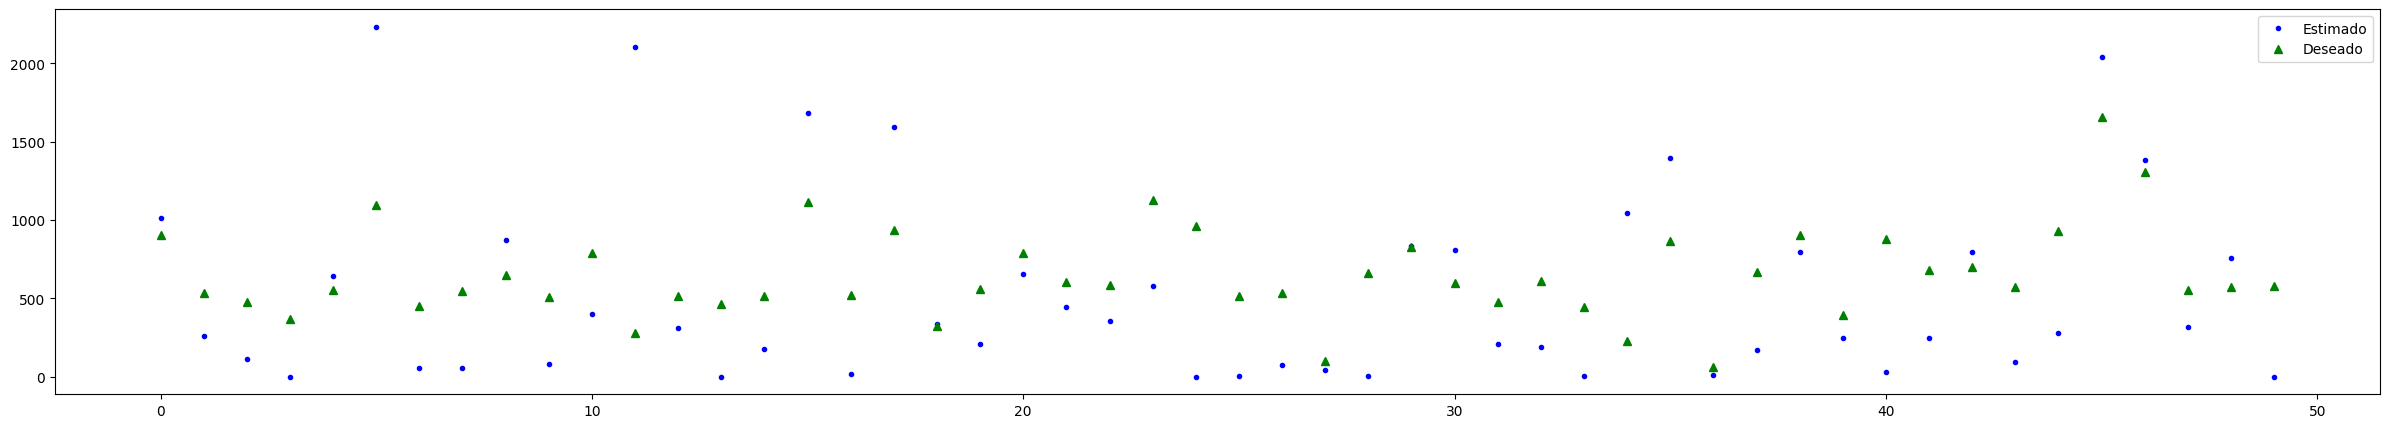

In [27]:
#Evaluación outer e impresión gráfica, valor deseado y estimado.
rmse_value_ridge = np.sqrt(mean_squared_error(y_test, pipe_regrRidge.predict(X=X_test)))
r2_ridge = r2_score(y_test, pipe_regrRidge.predict(X=X_test))

print(f"RMSE de regresión lineal: {rmse_value_ridge:.3f} $/energy")
print(f"Coeficiente de determinación R^2: {r2_ridge:.3f}")

pintaResultados(pipe_regrRidge, 50)


··························································································································································································································································
En cuanto a esta gráfica, podemos observar que hay grandes discrepancias entre los valores deseados y obtenidos para la variable de salida 'energy' y los valores de evaluación no son muy buenos.
··························································································································································································································································

··························································································································································································································································
Vamos a implementar un gráfico para contemplar cómo la regularización afecta la complejidad del modelo y penaliza a los coeficientes. Observar la evolución de los coeficientes nos proporciona información sobre qué características son más importantes para el modelo y cómo cambian su influencia a medida que se aplica más regularización.
··························································································································································································································································

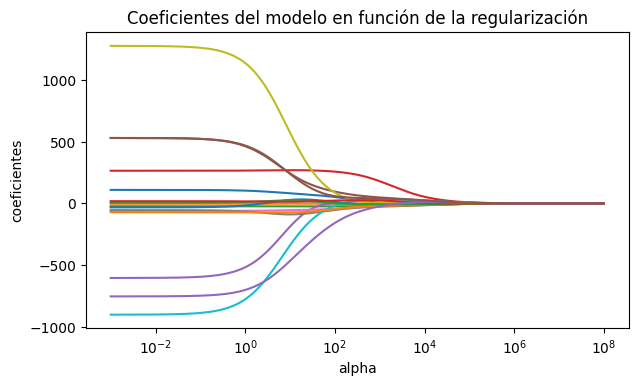

In [28]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrRidge['regresor'].alphas

coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', Ridge(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

··························································································································································································································································
Se puede notar que dos líneas (roja y lila) convergen más lentamente lo que sugiere que Ridge afecta a estos dos coeficientes con valores de alpha más grande.El modelo ridge nos dice que el mejor valor de alpha es aproximadamente 0.307..., por lo que esta regularización tiene poco efecto, ya que cuando alpha es muy pequeño (cerca de cero) la regularización Ridge tiene poco efecto y los coeficientes tienden a los valores que tendrían en una regresión lineal estándar(da mismos resultados que regresión lineal).
··························································································································································································································································


··························································································································································································································································
Vamos a realizar una gráfica para poder ver como en función de los distintos valores que va tomando alpha, va variando el valor de RMSE y quedarnos con el mejor valor de alpha para esta métrica.
··························································································································································································································································

Mejor valor de alpha encontrado: 0.3072112998861759


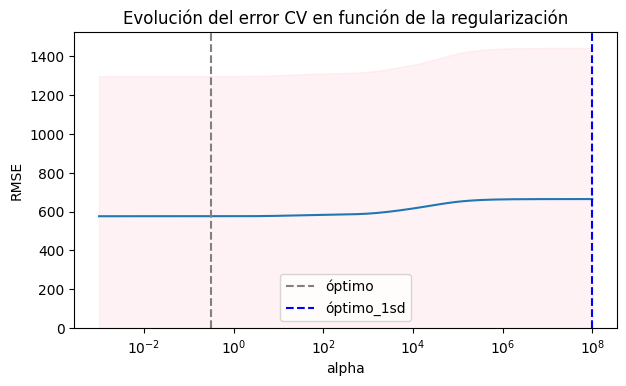

In [29]:
# Evolución del error en función de alpha
# ==============================================================================
mse_cv = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrRidge['regresor'].alphas[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrRidge['regresor'].alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrRidge['regresor'].alphas, rmse_cv)
ax.fill_between(
    pipe_regrRidge['regresor'].alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
    , color="pink"
)


ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {pipe_regrRidge['regresor'].alpha_}")

··························································································································································································································································
Tal y como se puede ver en la gráfica el valor óptimo de alpha para el mejor valor de RMSE se encuentra entre 10^-2 y 10^0 que con la impresión el mejor valor de alpha es exactamente 0.3072112998861759.
··························································································································································································································································

··························································································································································································································································
A continuación, vamos a identificar la importancia de cada coeficiente en este modelo.
··························································································································································································································································

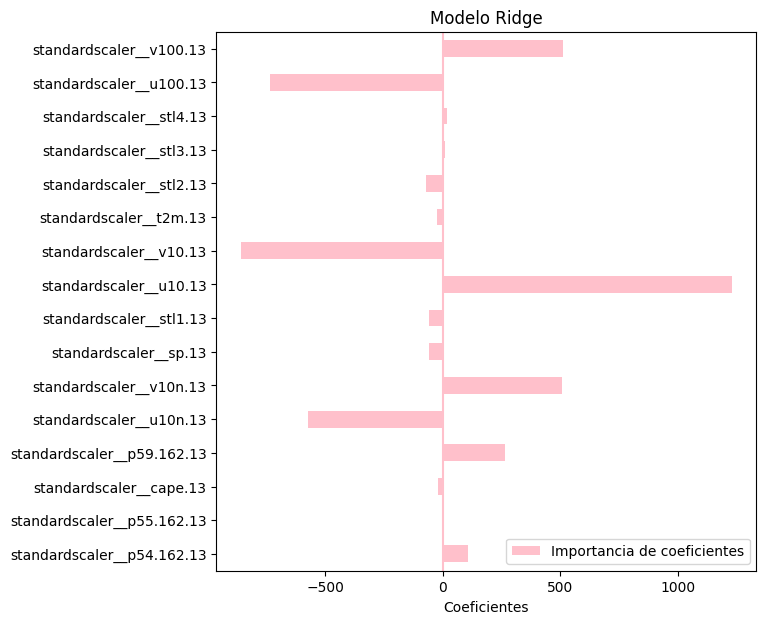

In [30]:
# Coeficientes del modelo
# ==============================================================================
coefs = pd.DataFrame(
    pipe_regrRidge['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7), color="pink")
plt.title("Modelo Ridge")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color="pink")
plt.subplots_adjust(left=0.3)

··························································································································································································································································
No hemos realizado búsqueda de hipérparametros para este modelo, porque el hiperparámetro a ajustar es alpha y ya lo hemos encontrado en el anterior procedimiento, por lo que el RMSE no variaría apenas. L aimportancia de los coeficientes es la misma o muy parecida a la lineal.
··························································································································································································································································

-----------------------------------------------------------------------------------------------------------------
## Lasso
-----------------------------------------------------------------------------------------------------------------

··························································································································································································································································
Vamos a implementar el modelo de Lasso. Lasso hace que algunos coeficientes puedan ser reducidos exactamente a cero, eliminando algunas variables predictoras de la predicción del modelo.
··························································································································································································································································

In [31]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
pipe_regrLasso = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            cv              = 3
         ))
])
start_time = time.time()
np.random.seed(23)
pipe_regrLasso.fit(X = X_train, y = y_train)
training_time_lasso = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_lasso)


Tiempo de entrenamiento: 0.36020374298095703


Coeficiente de determinación R^2: 0.304
RMSE de regresión lineal Lasso: 557.320 $/energy
Mejor aplpha: 0.12033778407775905


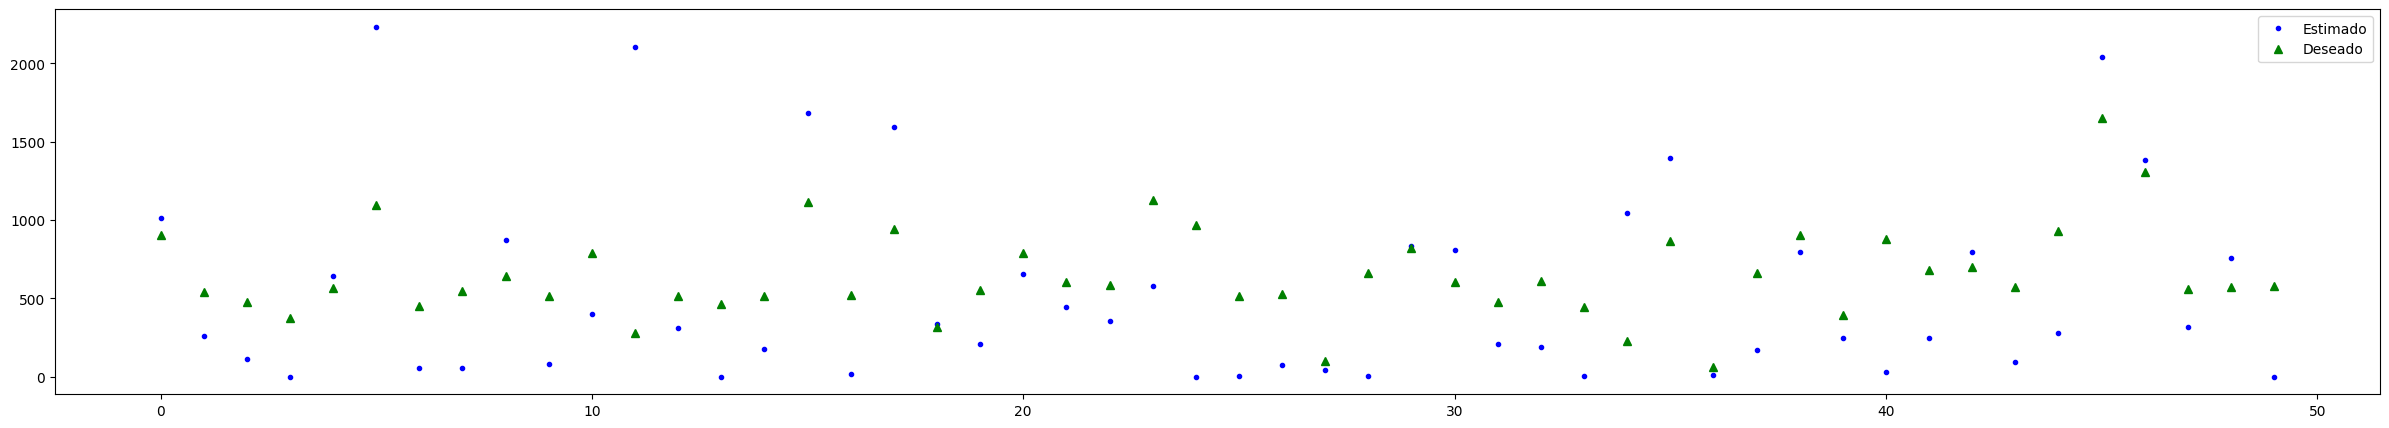

In [32]:
#Evaluación outer e imprimimos gráfica de valores deseados y estimados.
rmse_value_lasso = np.sqrt(mean_squared_error(y_test, pipe_regrLasso.predict(X=X_test)))
r2_lasso = r2_score(y_test, pipe_regrLasso.predict(X=X_test))

print(f"Coeficiente de determinación R^2: {r2_lasso:.3f}")
print(f"RMSE de regresión lineal Lasso: {rmse_value_lasso:.3f} $/energy")
print(f"Mejor aplpha: {pipe_regrLasso['regresor'].alpha_}")

pintaResultados(pipe_regrLasso,50)

··························································································································································································································································
En cuanto a esta gráfica, podemos observar que hay grandes discrepancias entre los valores deseados y obtenidos para la variable de salida 'energy' y los valores de evaluación no son muy buenos.
··························································································································································································································································

 ··························································································································································································································································
 Un alpha bajo implica una regularización más débil, lo que permite que los coeficientes se ajusten más libremente y de resultados similares al modelo de regresión lineal, no está apenas penalizando.
 ··························································································································································································································································

··························································································································································································································································
Vamos a implementar un gráfico para contemplar cómo la regularización afecta la complejidad del modelo y penaliza a los coeficientes. Observar la evolución de los coeficientes nos proporciona información sobre qué características son más importantes para el modelo y cómo cambian su influencia a medida que se aplica más regularización.
··························································································································································································································································

In [33]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrLasso['regresor'].alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', preprocessor),
        ('regresor', Lasso(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-2.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

KeyboardInterrupt: 

··························································································································································································································································
La forma de la función de pérdida de Lasso (L1) es más propensa a forzar los coeficientes a cero en comparación con la función de pérdida de Ridge.
··························································································································································································································································

··························································································································································································································································
A continuación vamos a realizar una grafica de la importancia de los coeficientes en este modelo.
··························································································································································································································································

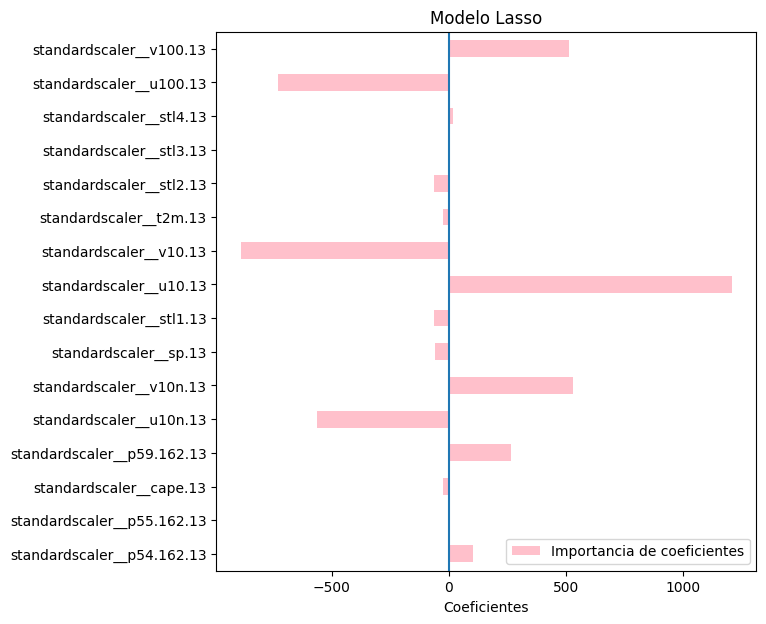

In [ ]:
coefs = pd.DataFrame(
    pipe_regrLasso['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7), color='pink')
plt.title("Modelo Lasso")
plt.xlabel("Coeficientes")
plt.axvline(x=0)
plt.subplots_adjust(left=0.3)

··························································································································································································································································
No hemos realizado búsqueda de hipérparametros para este modelo, porque el hiperparámetro a ajustar es alpha y ya lo hemos encontrado en el anterior procedimiento, por lo que el RMSE no variaría apenas. Misma importancia de coeficientes que los anteriores modelos.
··························································································································································································································································

··························································································································································································································································
También podemos ver que los valores u10-u10n-u100 y v10-v10n y v100 son en estos gráficos de importancia de coeficientes los coeficientes con mayor relevancia. Al estar altamente correlados eliminar dos de ellos y quedarnos con el más importante podría mejorar los resultados de estos modelos de regresión lineal.
··························································································································································································································································

··························································································································································································································································
En los modelos de regresión lineal evaluados, el ajuste de hiperparámetros no contribuye a la mejora del modelo y toma tiempos de ejecución mayores, por ello no se añadió en este notebook.
··························································································································································································································································

-----------------------------------------------------------------------------------------------------------------
## SVM
-----------------------------------------------------------------------------------------------------------------

·································································································································································································································································································································
Ahora, pasaremos a implementar el modelo SVM cuyo objetivo es encontrar el hiperplano óptimo que mejor separa los puntos de datos de diferentes clases en un espacio dimensional. Este hiperplano se elige de tal manera que maximiza la distancia entre los puntos de datos más cercanos de diferentes clases, que se llaman vectores de soporte.  
·································································································································································································································································································································

----------------------------------------------------------------------------------------------------------------
## SVM LINEAL
----------------------------------------------------------------------------------------------------------------

·································································································································································································································································································································
Vamos a primero utilizar un modelo de SVM lineal, en el que si los datos son linealmente separables este modelo dará buenos resultados. En caso de que no lo sea ,será mejor utilizar otro modelo SVM como es el radial para problemas más complejos.
·································································································································································································································································································································

·································································································································································································································································································································
Función para el cálculo de rmse.
·································································································································································································································································································································

In [ ]:
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

··························································································································································································································································
Primero, vamos a implementar el modelo sin nigun ajuste de hiperparámetros para poder luego comparar los resultados de las métricas de evaluación cuando se realiza la búsqueda. Es importante en SVM escalar los datos.
··························································································································································································································································

In [ ]:
#Configuración del modelo.
svr_lineal = SVR(kernel="linear")
escalar = StandardScaler()

pipe_regr_lineal = Pipeline([
    ('escalar', escalar),
    ('SVM', svr_lineal)])

#Entrenamiento y evaluación outer.
np.random.seed(23)
start_time = time.time()
pipe_regr_lineal.fit(X=X_train, y=y_train)
training_time_svm_lineal = time.time() - start_time
rmse_svm_lineal = rmse(y_test, pipe_regr_lineal.predict(X=X_test))
print("Tiempo de entrenamiento:", training_time_svm_lineal)
print(f"RMSE of SVR with default hyper-pars: {rmse(y_test, pipe_regr_lineal.predict(X=X_test))}")
r2_svm_lineal = r2_score(y_test, pipe_regr_lineal.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_svm_lineal:.3f}")
print(f"Param C: {pipe_regr_lineal['SVM'].C}")

Tiempo de entrenamiento: 0.34604310989379883
RMSE of SVR with default hyper-pars: 588.1059534322058
Coeficiente de determinación R^2: 0.224
Param C: 1.0


··························································································································································································································································
A continuación, procederemos a buscar los mejores hiperparámetros para nuestro modelo utilizando tanto Random Search como Grid Search. Si Grid Search no tarda mucho tiempo en ejecutarse, nos quedaremos con esta opción, ya que explora exhaustivamente todas las combinaciones posibles de hiperparámetros para encontrar los mejores.
··························································································································································································································································

··························································································································································································································································
Búsqueda con Randomized Search, hipérparametro es:<br>
-C: Parámetro de penalización. En caso de que C sea bajo será más tolerante a los fallos a la hora de clasificar, en caso de que C sea alto se intentará perfeccionar la clasificación de los resultados pero podría ocasionar sobreajuste. Tener en cuenta que si l mejor valor de C está en los límites ampliar límite.
··························································································································································································································································

In [ ]:

budget = 20
param_grid = {'SVM__C': [ 1, 10, 100, 1000, 10000,15000, 20000, 30000, 50000]}  #Tener en cuenta que si l mejor valor de C está en los límites ampliar límite.
inner = KFold(n_splits=3, shuffle=True, random_state=23)
hpo_regr_lineal = RandomizedSearchCV(pipe_regr_lineal,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1,
                        n_iter=budget)
#Evaluación outer y entrenamiento.
np.random.seed(23)
start_time = time.time()
hpo_regr_lineal.fit(X=X_train, y=y_train)
rmse_svm_lineal_randomized = rmse(y_test, hpo_regr_lineal.predict(X=X_test))
r2_svm_lineal_randomized = r2_score(y_test, pipe_regr_lineal.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_svm_lineal_randomized:.3f}")
training_time_svm_lineal_randomized = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_svm_lineal_randomized)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Coeficiente de determinación R^2: 0.224
Tiempo de entrenamiento: 83.91089057922363


In [ ]:
print(f"Best params: {hpo_regr_lineal.best_params_}, best score (inner!): {np.sqrt(-hpo_regr_lineal.best_score_)}")
print(f"RMSE (outer!) of SVR with hyper-parameter tuning (randomized-Search): {rmse(y_test, hpo_regr_lineal.predict(X=X_test))}")

Best params: {'SVM__C': 10000}, best score (inner!): 594.7834276684719
RMSE (outer!) of SVR with hyper-parameter tuning (randomized-Search): 570.2488211095374


··························································································································································································································································································································
Como podemos observar el valor de C es un número grande por lo que se puede decir que este modelo tiende a perfeccionar y clasificar bien cada punto de entrenamiento, lo que podría conllevar a un sobreajuste.
··························································································································································································································································································································

··························································································································································································································································································································
Búsqueda con Grid Search, hipérparametros:<br>
-C: Parámetro de penalización. En caso de que C sea bajo será más tolerante a los fallos a la hora de clasificar, en caso de que C sea alto se intentará perfeccionar la clasificación de los resultados pero podría ocasionar sobreajuste. Tener en cuenta que si l mejor valor de C está en los límites ampliar límite.
··························································································································································································································································································································

In [ ]:
param_grid = {'SVM__C': [ 1, 10, 100, 1000, 10000,15000, 20000, 30000, 50000]}  

hpo_regr_lineal = GridSearchCV(pipe_regr_lineal,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)

# Entrenar el modelo y evaluación outer
start_time = time.time()
np.random.seed(23)
hpo_regr_lineal.fit(X=X_train, y=y_train)
training_time_svm_grid_search = time.time() - start_time
rmse_svm_grid_search = rmse(y_test, hpo_regr_lineal.predict(X=X_test))
r2_svm_grid_search = r2_score(y_test, pipe_regr_lineal.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_ridge:.3f}")
print("Tiempo de entrenamiento:", training_time_svm_grid_search)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


Coeficiente de determinación R^2: 0.304
Tiempo de entrenamiento: 77.40320086479187


In [ ]:
print(f"Best params: {hpo_regr_lineal.best_params_}, best score (inner!): {np.sqrt(-hpo_regr_lineal.best_score_)}")
print(f"RMSE (outer!) of SVR with hyper-parameter tuning (grid-search): {rmse(y_test, hpo_regr_lineal.predict(X=X_test))}")

Best params: {'SVM__C': 10000}, best score (inner!): 594.7834276684719
RMSE (outer!) of SVR with hyper-parameter tuning (grid-search): 570.2488211095374


··························································································································································································································································································································
Obtenidos los resultados de ambas búsquedas llegamos a la conclusión de que tanto Randomized Search como Grid Search nos dan valores similares de error y de tiempo, por lo que como hemos dicho anteriormente, nos quedaremos con  el método de Grid Search para los posteriores modelos de SVM.
··························································································································································································································································································································

·································································································································································································································································································································
El mejor C no está en los limites de los rangos, en caso de que los estuviera habría que seguir ampliando el rango de los valores de C para poder seleccionar el mejor y ajustar el modelo con el mejor hiperparámetro.
··································································································································································································································································································································

-----------------------------------------------------------------------------------------------------------------
## SVM RADIAL
-----------------------------------------------------------------------------------------------------------------

·································································································································································································································································································································
Ahora pasamos a utilizar un modelo de SVM radial, que se caracteriza por ser utilizado en problemas con datos que no son linealmente separables usand un kernel radial para transformar los datos en un espacio de características de mayor dimensión.
·································································································································································································································································································································

·································································································································································································································································································································
SVM RADIAL con parámetros por defecto sin niguna HPO, para poder comparar posteriormente con los resultados con ajuste de hiperparámetros.
·································································································································································································································································································································

In [ ]:
#CONFIGURACIÓN
svr_radial = SVR() #Por defecto es el Kernel radial

pipe_regr_radial_def = Pipeline([
    ('escalar', escalar),
    ('SVM', svr_radial)])

#Entrenamiento y evaluación outer
start_time = time.time()
np.random.seed(23)
pipe_regr_radial_def.fit(X=X_train, y=y_train)
rmse_svm_radial = rmse(y_test, pipe_regr_radial_def.predict(X=X_test))
print(f"Param C: {pipe_regr_radial_def['SVM'].C}, y gamma: {pipe_regr_radial_def['SVM'].gamma}")
print(f"RMSE of SVR with default hyper-pars: {rmse(y_test, pipe_regr_radial_def.predict(X=X_test))}")
r2_svm_radial= r2_score(y_test, pipe_regr_radial_def.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_svm_radial:.3f}")
training_time_svm_radial = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_svm_radial)

Param C: 1.0, y gamma: scale
RMSE of SVR with default hyper-pars: 641.8609344913763
Coeficiente de determinación R^2: 0.076
Tiempo de entrenamiento: 2.012669801712036


·································································································································································································································································································································
SVM RADIAL GRID
·································································································································································································································································································································

······························································································································································································································································································································
Búsqueda con Grid Search, hipérparametro es:<br>
-C:Parámetro de penalización. En caso de que C sea bajo será más tolerante a los fallos a la hora de clasificar, en caso de que C sea alto se intentará perfeccionar la clasificación de los resultados pero podría ocasionar sobreajuste. Tener en cuenta que si l mejor valor de C está en los límites ampliar límite.<br>
-Gamma: Parámetro que si es bajo tiene en cuenta la influencia de los puntos más cercanos al hiperplano y si es alto tiene en cuenta la influencia de los puntos más lejanos.
·······························································································································································································································································································································

In [ ]:
param_grid = {'SVM__C': [0.001, 0.01, 1, 10, 100, 1000, 10000, 100000],
              'SVM__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

#Vamos autilizar validación cruzada.
inner = KFold(n_splits=3, shuffle=True, random_state=23)

hpo_regr_radial = GridSearchCV(pipe_regr_radial_def,
                               param_grid,
                               scoring='neg_mean_squared_error',
                               cv=inner,
                               n_jobs=4, verbose=1)

# Entrenamos modelo y tiempo.
np.random.seed(23)
start_time = time.time()
hpo_regr_radial.fit(X=X_train, y=y_train)
training_time_svm_radial_grid = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_svm_radial_grid)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Tiempo de entrenamiento: 38.167908906936646


In [ ]:
#Evaluación outer.
print(f"Best params: {hpo_regr_radial.best_params_}, best score (inner!): {np.sqrt(-hpo_regr_radial.best_score_)}")
print(f"RMSE (outer!) of SVR with hyper-parameter tuning (grid-search): {rmse(y_test, hpo_regr_radial.predict(X=X_test))}")
rmse_radial_grid = rmse(y_test, hpo_regr_radial.predict(X=X_test))
r2_radial_grid = r2_score(y_test, hpo_regr_radial.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_radial_grid:.3f}")

Best params: {'SVM__C': 1000, 'SVM__gamma': 0.1}, best score (inner!): 376.08342924603886
RMSE (outer!) of SVR with hyper-parameter tuning (grid-search): 358.23123073319624
Coeficiente de determinación R^2: 0.712


·································································································································································································································································································································
El mejor C no está en los limites de los rangos, en caso de que los estuviera habría que seguir ampliando el rango de los valores de C para poder seleccionar el mejor y ajustar el modelo con el mejor hiperparámetro.
··································································································································································································································································································································

## RANDOMIZED SEARCH DISTRIBUCIONES ESTADÍSTICAS

·································································································································································································································································································································· 
Una ventaja que tiene Randomized Search es que podemos definir el espacio de búsqueda con distribuciones estadísticas, en lugar de utilizar valores particulares como hacíamos antes. Así podemos probar dentro de un amplio rango de valores de hiperparámetros sin necesidad de definir valores específicos. ··································································································································································································································································································································

In [ ]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
#Configuración modelo, distribuciones estadísticas.
budget = 50
# Search space
param_grid = {'SVM__C': loguniform(1e-1, 1e4),
              'SVM__gamma': loguniform(1e-5, 1e1)}
#Búsqueda con RandomizedSearch.
hpo_regr_radial = RandomizedSearchCV(pipe_regr_radial_def,
                            param_grid,
                            scoring='neg_mean_squared_error',
                            cv=inner,
                            n_jobs=4, verbose=0,
                            n_iter=budget
                        )
#Evaluación del modelo y entrenamos.
start_time = time.time()
np.random.seed(23)
hpo_regr_radial.fit(X=X_train, y=y_train)
rmse_svm_dist = rmse(y_test, hpo_regr_radial.predict(X=X_test))
training_time_svm_dist_random = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_svm_dist_random)
r2_svm_dist = r2_score(y_test, hpo_regr_radial.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_svm_dist :.3f}")

Tiempo de entrenamiento: 19.581977605819702
Coeficiente de determinación R^2: 0.716


In [ ]:
print(f"Best params: {hpo_regr_radial.best_params_}, best score (inner!): {np.sqrt(-hpo_regr_radial.best_score_)}")
print(f"RMSE (outer!) of SVR with hyper-parameter tuning (randomized-search): {rmse(y_test, hpo_regr_radial.predict(X=X_test))}")

Best params: {'SVM__C': 1295.1846703460897, 'SVM__gamma': 0.05716079070593169}, best score (inner!): 374.8197344141171
RMSE (outer!) of SVR with hyper-parameter tuning (randomized-search): 356.0379189074334


·································································································································································································································································································································· 
Por ahora es el mejor modelo entrenado, tanto para el valor de RMSE como el de R^2, su valor de C es alto por lo que significa que perfecciona a la hora de clasificar los puntos. Tienen más influencia los puntos más cercanos al hiperplano.
·································································································································································································································································································································· 

-----------------------------------------------------------------------------------------------------------------
## RANDOM FOREST
-----------------------------------------------------------------------------------------------------------------

··································································································································································································································································································································
 Pasamos ahora a implementar el algoritmo de random forest que consiste en construir múltiples árboles de decisión durante el entrenamiento y combinar sus predicciones para obtener una predicción final. ··································································································································································································································································································································

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df,test_size=0.33, random_state=23)

In [ ]:
# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend();

·································································································································································································································································································································· Implementación de Random Forest con parámetros por defecto. ··································································································································································································································································································································

RMSE de RF: 376.4718102483692
Tiempo de entrenamiento: 0.29514551162719727
Coeficiente de determinación R^2: 0.682


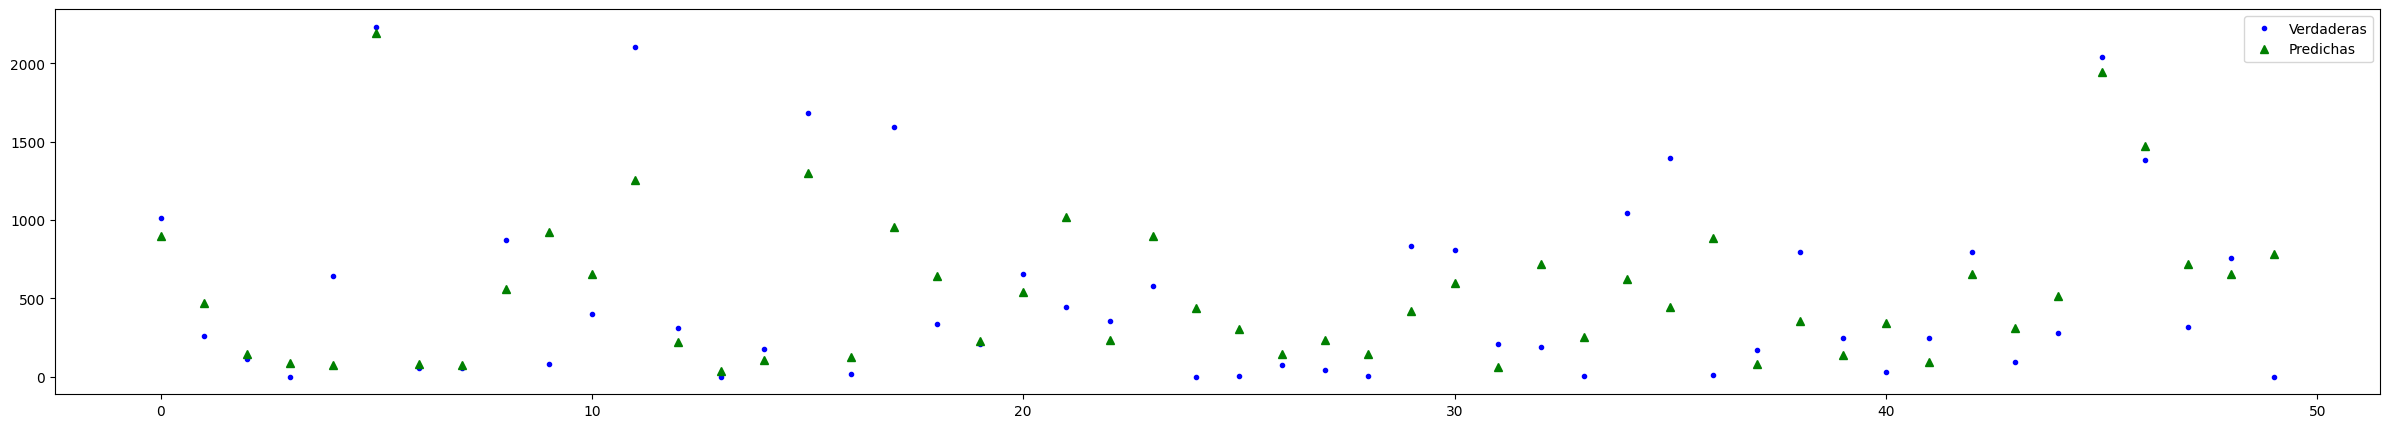

In [ ]:
# CONFIGURACIÓN DEL MODELO.
regr_rf = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 23
         )

# Entrenamiento del modelo y evaluación outer.
# ==============================================================================
start_time = time.time()
regr_rf.fit(X_train, y_train)
print(f"RMSE de RF: {rmse(y_test, regr_rf.predict(X=X_test))}")
pintaResultados(regr_rf,50)
rmse_random_forest = rmse(y_test, regr_rf.predict(X=X_test))
r2_random_forest = r2_score(y_test, regr_rf.predict(X=X_test))
training_time_random_forest = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_random_forest)
print(f"Coeficiente de determinación R^2: {r2_random_forest:.3f}")

··································································································································································································································································································································
Random Forest con HPO. Los hiperparámetros son:<br>
-n_estimators: Este hiperparámetro determina la cantidad de árboles de decisión que se utilizarán.<br>
-max_features: Es el número máximo de carácteristicas que Random Forest utiliza, no supera el numero de atributos.<br>
Vamos a primero calcular y analizar los mejores valores de RMSE Y R2 para hacer nuestra evaluación outer por separado, sin utilizar ningún método de ajuste de hiperparámetros(con un bucle for) y posteriormente utilizaremos randomized search para ajustar estos dos hiperparámetros.
··································································································································································································································································································································

Tiempo de entrenamiento: 10.690736293792725
Valor óptimo de n_estimators: 111
Mejor R^2: 0.6892242020574809


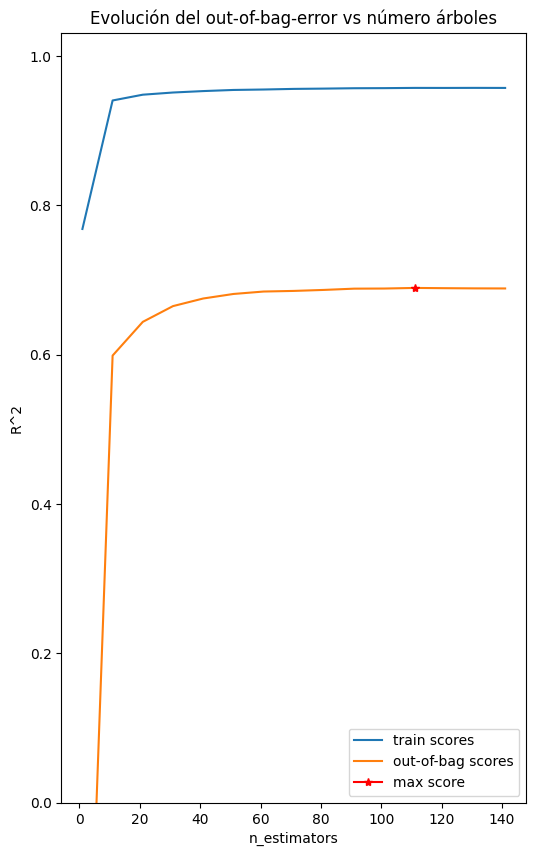

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 10)
start_time = time.time()

for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 23
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 10))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='*', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
ax.set_ylim([0,None])
plt.legend();
training_time_svm_radial = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_svm_radial)
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")
print("Mejor R^2:", max(oob_scores))

·································································································································································································································································································································· 
La gráfica nos ayuda a identificar el punto en el que el modelo de Random Forest alcanza su mejor rendimiento en datos no vistos (estimado a través del error OOB), lo que nos permite seleccionar el número óptimo de árboles. A medida que el valor de n_estimators va aumentando da mejores valores en R^2 pero a medida que se aumenta en más de 111 se podrucen peores resultados de R^2 posiblemnte debido al sobreajuste. ··································································································································································································································································································································

Valor óptimo de n_estimators: 141
Mejor valor de RMSE: 374.62355822596527 con n_estimators = 141


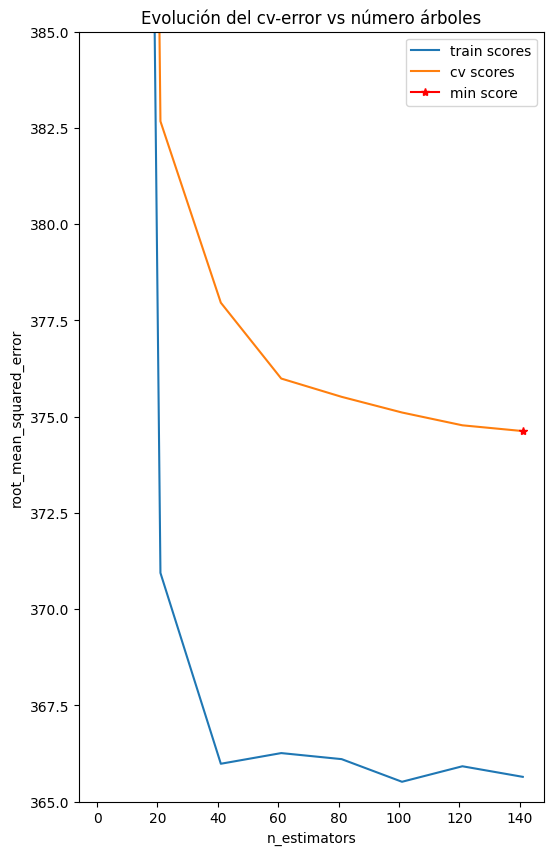

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
from sklearn.model_selection import cross_val_score


train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:

    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = False,
                n_jobs       = -1,
                random_state = 23
             )

    # Error de train
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 3
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 10))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='*', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
ax.set_ylim([365,385])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")
best_n_estimators = estimator_range[np.argmin(cv_scores)]
best_rmse = min(cv_scores)
print(f"Mejor valor de RMSE: {best_rmse} con n_estimators = {best_n_estimators}")


··································································································································································································································································································································
Esta otra gráfica muestra la evolución del error de validación cruzada y el error de entrenamiento en función del número de árboles (n_estimators) utilizados en el modelo de Random Forest. Podemos ver que el punto mínimo, es decir, el mejor modelo según la validación cruzada, se encuentra con 80 estimadores y con un error rmse entre 372.5 y 375.0.
··································································································································································································································································································································

Valor óptimo de max_features: 7
Mejor R^2: 0.6941640137961227


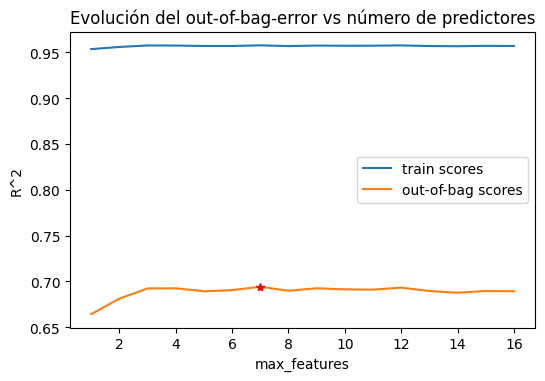

In [ ]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 111, #Valor optimo anterior para R^2
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 23
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='*', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")
print("Mejor R^2:", max(oob_scores))

·································································································································································································································································································································· 
Esta gráfica muestra la evolución del error Out-of-Bag (OOB) y el rendimiento del modelo en el conjunto de entrenamiento en función del número de predictores (o características) y nos ayuda a seleccionar el número óptimo de predictores (max_features) al observar cómo varía el rendimiento del modelo en el conjunto de entrenamiento y el error Out-of-Bag con diferentes valores de este hiperparámetro. Observamos que el valor máximo de R2 está entre 0.65 y 0.70 con un número de estimadores de 7, este punto representa el mejor modelo según el OBB. ··································································································································································································································································································································

Mejor valor de RMSE: 372.69600171433984 con max_features = 5


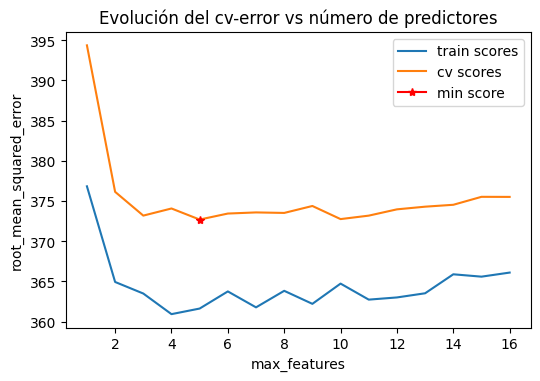

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:

    modelo = RandomForestRegressor(
                n_estimators = 81,  #Mejor valor rmse
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 23
             )

    # Entrenamos el modelo.
    modelo.fit(X_train, y_train)
    train_scores.append(rmse(y_test, modelo.predict(X=X_test)))

    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 3
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())

# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='*', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
best_max_features = max_features_range[np.argmin(cv_scores)]
best_rmse = min(cv_scores)
print(f"Mejor valor de RMSE: {best_rmse} con max_features = {best_max_features}")

·································································································································································································································································································································· 
Finalmente mostramos muestra la evolución del error de validación cruzada y el error de entrenamiento, pero en función del número de predictores, gracias a ella podemos seleccionar el número óptimo de predictores. En este caso el valor mínimo de rmse de validación cruzada se encuentra en un rango de 370 hasta 375 par un número máximo de predictores de 10. Este sería el mejor modelo según la métrica de validación cruzada. ··································································································································································································································································································································

··································································································································································································································································································································
Búsqueda de hiperparámetros con Randomized Search,esto permite a lo contrario que lo anterior a buscar dentro de n_estimators en un rango más amplio y no ir pegando saltos de 20 en 20. Como se puede ver da el mismo valor de max_features, anteriormente analizado, pero da un valor más específico de n_estimators en un rango más amplio.
··································································································································································································································································································································

In [ ]:
#Búsqueda de hiperparametros(n_estimators y max_features).
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X_train.shape[1])}

inner = KFold(n_splits=3, shuffle=True, random_state=23)

budget = 50
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
regr = RandomizedSearchCV(RandomForestRegressor(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

np.random.seed(23)
#Entrenamos y evaluación outer del modelo.
start_time = time.time()
regr.fit(X_train, y_train)
rmse_random_forest_randomized = rmse(y_test, regr.predict(X=X_test))
r2_random_forest_randomized  = r2_score(y_test, regr.predict(X=X_test))
training_time_random_forest_randomized = time.time() - start_time
print("Tiempo de entrenamiento:", training_time_random_forest_randomized)
print(f"Coeficiente de determinación R^2: {r2_random_forest_randomized:.3f}")
best_estimator = regr.best_estimator_
print("Mejores parámetros encontrados por la búsqueda aleatoria:")
print(regr.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tiempo de entrenamiento: 34.136542320251465
Coeficiente de determinación R^2: 0.705
Mejores parámetros encontrados por la búsqueda aleatoria:
{'max_features': 6, 'n_estimators': 170}


·································································································································································································································································································································· 
Con un budget mayor que 20, poniendo 50 da mejores resultados debido a que prueba más combinaciones. ··································································································································································································································································································································

RMSE de RF con búsqueda de hiperparámetros: 362.9637430363361


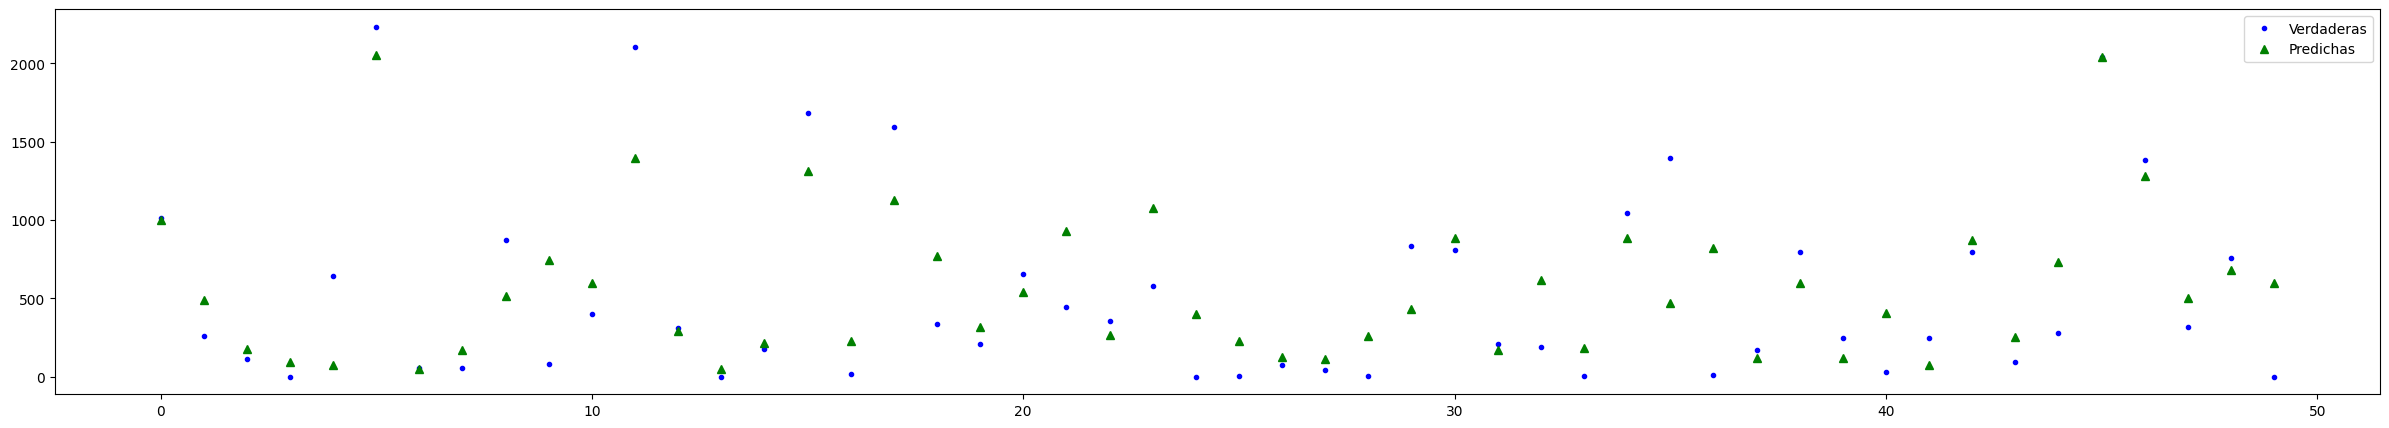

In [ ]:
print(f"RMSE de RF con búsqueda de hiperparámetros: {rmse(y_test, regr.predict(X=X_test))}")
pintaResultados(regr,50)

## EXTRA TREES

·································································································································································································································································································································· 
Ahora tratamos con árboles extremadamente aleatorizados, que se trata de una técnica similar a random forest solo que en Extra Trees se generan los árboles de una manera más aleatoria que en random forest, gracias a esta aleatoriedad extra el entrenamiento en Extra Trees. Tiene los mismos hiperparámetros que son n_estimators y max_features. ··································································································································································································································································································································

In [ ]:

# espacio de búsqueda
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X_train.shape[1])}

inner = KFold(n_splits=3, shuffle=True, random_state=23)

budget = 100
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
regr = RandomizedSearchCV(ExtraTreesRegressor(),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         refit=True,
                         cv=inner,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )
#Entrenamos y evaluación outer.
np.random.seed(23)
start_time = time.time()
regr.fit(X=X_train, y=y_train)
rmse_extra_tree= rmse(y_test, regr.predict(X=X_test))
r2_extra_tree = r2_score(y_test, regr.predict(X=X_test))
training_extra_tree = time.time() - start_time
print("Tiempo de entrenamiento:", training_extra_tree)
print(f"Coeficiente de determinación R^2: {r2_extra_tree:.3f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Tiempo de entrenamiento: 23.592993021011353
Coeficiente de determinación R^2: 0.709


RMSE de RF con búsqueda de hiperparámetros: 359.97990997787167


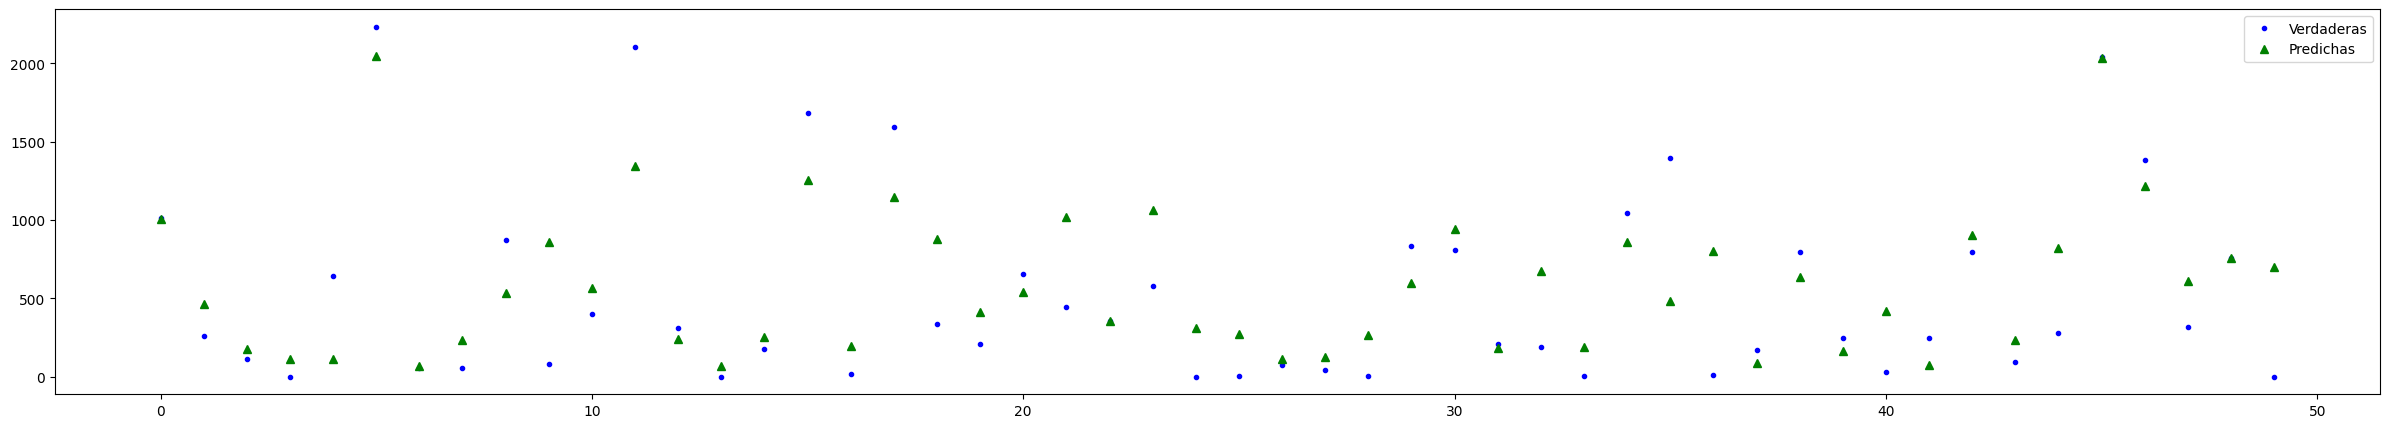

In [ ]:
print(f"RMSE de RF con búsqueda de hiperparámetros: {rmse(y_test, regr.predict(X=X_test))}")
pintaResultados(regr,50)

In [ ]:
#Mejores parámetros.
regr.best_params_, -regr.best_score_

({'max_features': 6, 'n_estimators': 170}, 137385.54969002464)

----------------------------------------------------------------------------------------------------------------
## Seleccion de caracteristicas:
----------------------------------------------------------------------------------------------------------------

··············································································································································································································································································································································
Ahora se realiza el modelo de extratrees pero ajustando el hiperparámetro K, que lo que hará es dentro de la selección de características solo cojerá las mejores, es decir si k es 9, cogerá las nueve mejores carácteristicas, las más importantes para el modelo.
··············································································································································································································································································································································

In [ ]:
#Configuración modelo.
scaler = StandardScaler()
selector = SelectKBest(f_regression)
extratrees = ExtraTreesRegressor(max_features=5, n_estimators = 160 )

pipe_select_scale_extratrees = Pipeline([
    ('scale', scaler),
    ('select', selector),
    ('extratrees', extratrees)])

# Vamos a comprobar que valor de K sería el mejor
param_grid = {'select__k': list(range(1,16))}
inner = KFold(n_splits=3, shuffle=True, random_state = 23 )
# Como es pequeño podemos usar GridSearch
tune_select_scale_extratrees = GridSearchCV(pipe_select_scale_extratrees,
                                     param_grid,
                                     scoring="neg_mean_squared_error",
                                     cv=inner
                                     )

In [ ]:
#Entrenamos modelo.
np.random.seed(23)
strart_time = time.time()
tune_select_scale_extratrees.fit(X_train, y_train)
training_extra_tree_select_k = time.time() - start_time
print("Tiempo de entrenamiento:", training_extra_tree_select_k)

Tiempo de entrenamiento: 54.84614181518555


In [ ]:
# Comprobamos el valor de K seleccionado
tune_select_scale_extratrees.best_params_, np.sqrt(-tune_select_scale_extratrees.best_score_)

({'select__k': 15}, 372.75413830071034)

·············································································································································································································································································································································· Como podemos ver selecciona todas menos una la cual es p55.162.13, lo tendremos en cuenta como posible eliminación, en el EDA ya pudimos observar que este atributo estaba poco correlado con la variable respuesta. ··············································································································································································································································································································································

In [ ]:
trained_pipeline = tune_select_scale_extratrees.best_estimator_

print(f"Selección: {trained_pipeline.named_steps['select'].get_support()}")

print(f"Indices seleccionados: {np.where(trained_pipeline.named_steps['select'].get_support())}")
trained_pipeline = tune_select_scale_extratrees.best_estimator_

# Obtener la máscara de características seleccionadas
mask_features_selected = trained_pipeline.named_steps['select'].get_support()

# Obtener los nombres de las características originales
feature_names = X_train.columns

# Obtener los índices de las características no seleccionadas
indices_unselected = np.where(~mask_features_selected)[0]

# Obtener los nombres de las características no seleccionadas
unselected_features = feature_names[indices_unselected]

# Imprimir los nombres de las características no seleccionadas
print("No seleccionados:", unselected_features)
rmse_extra_tree_selct_k= rmse(y_test, trained_pipeline.predict(X=X_test))
r2_extra_tree_selct_k = r2_score(y_test, trained_pipeline.predict(X=X_test))
print(f"Coeficiente de determinación R^2: {r2_extra_tree_selct_k:.3f}")


Selección: [ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
Indices seleccionados: (array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64),)
No seleccionados: Index(['p55.162.13'], dtype='object')
Coeficiente de determinación R^2: 0.711


··············································································································································································································································································································································
A continuación un gráfico que muestra el RMSE en función del valor de K(número de características). Se puede ver que a medida que se aumenta el número de características, mejores resultados dan.
··············································································································································································································································································································································

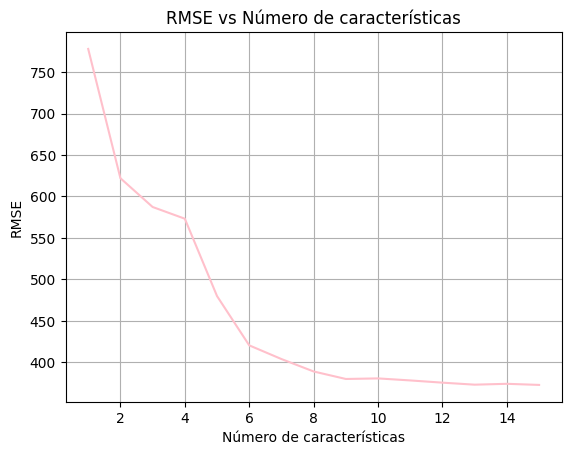

In [ ]:
# Obtener los resultados del GridSearchCV
results = tune_select_scale_extratrees.cv_results_

# Calcular RMSE a partir del negativo de los puntajes de validación cruzada
rmse_scores = np.sqrt(-results['mean_test_score'])

# Graficar los resultados
plt.plot(results['param_select__k'].data, rmse_scores,color='pink')
plt.ylabel('RMSE')
plt.xlabel('Número de características')
plt.title('RMSE vs Número de características')
plt.grid(True)
plt.show()

RMSE de Extra con selección de características: 359.0605503720928


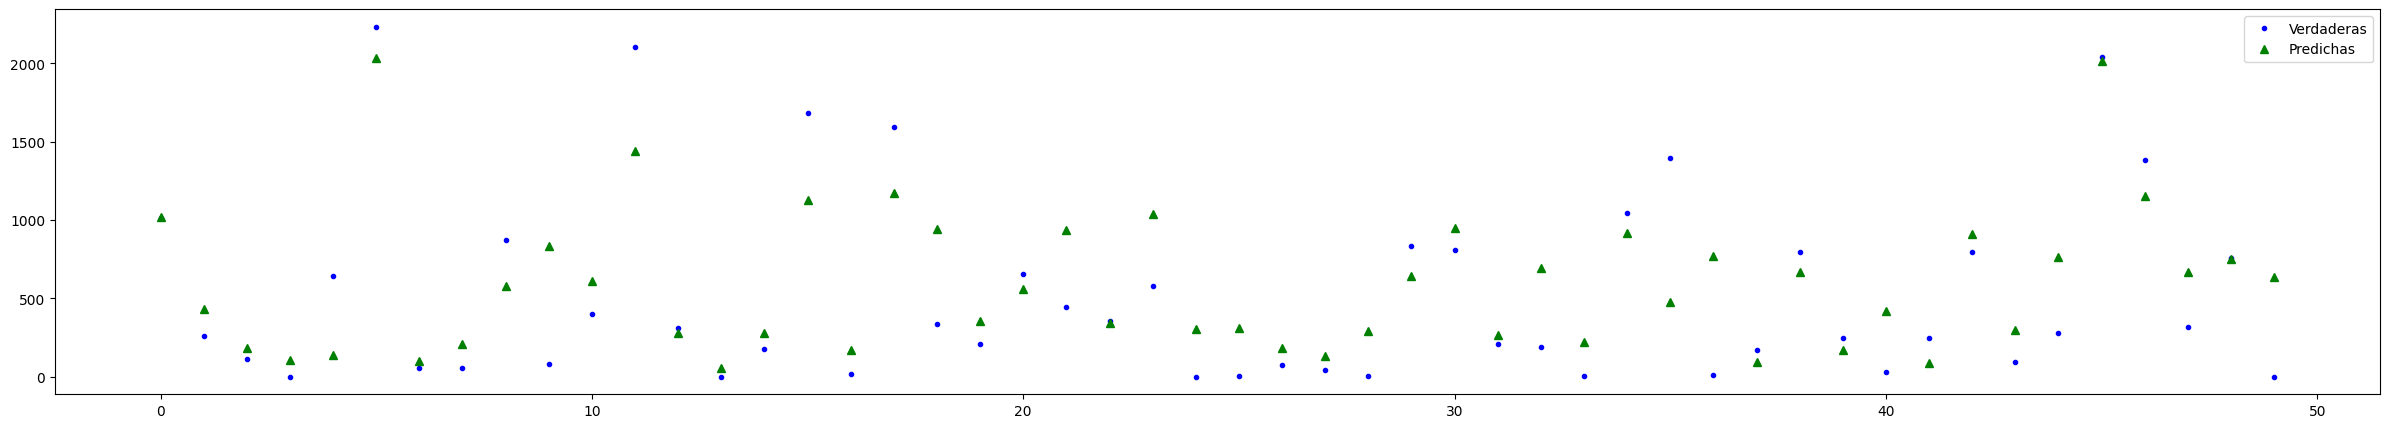

In [ ]:
# from sklearn.metrics import mean_squared_error
print(f"RMSE de Extra con selección de características: {rmse(y_test, trained_pipeline.predict(X=X_test))}")
pintaResultados(trained_pipeline,50)

----------------------------------------------------------------------------------------------------------------
## Tiempos de entreno de modelos.
----------------------------------------------------------------------------------------------------------------

·····································································································································································································································································
Vamos a realizar gráficas de tiempo, de rmse y de r2 para poder comparar cada modelo y finalmente seleccionar uno.
·····································································································································································································································································

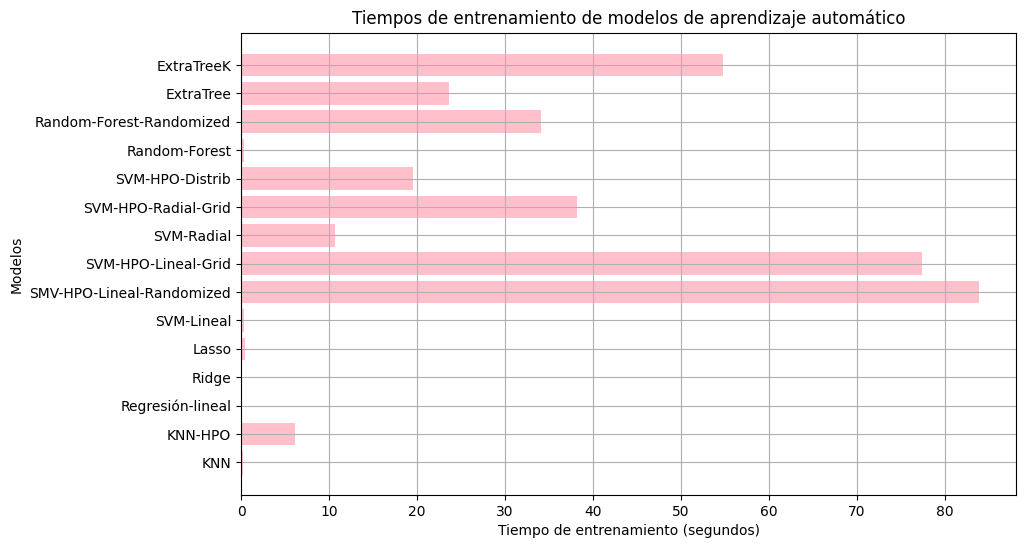

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo: modelos de aprendizaje automático y tiempos de entrenamiento
modelos = ['KNN', 'KNN-HPO', 'Regresión-lineal', 'Ridge', 'Lasso', 'SVM-Lineal', 'SMV-HPO-Lineal-Randomized', 'SVM-HPO-Lineal-Grid', 'SVM-Radial', 'SVM-HPO-Radial-Grid', 'SVM-HPO-Distrib', 'Random-Forest', 'Random-Forest-Randomized', 'ExtraTree','ExtraTreeK']
tiempos_entrenamiento = [training_time_knn, training_time_random_search_knn, training_time_rgln, training_time_ridge, training_time_lasso, training_time_svm_lineal, training_time_svm_lineal_randomized, training_time_svm_grid_search, training_time_svm_radial, training_time_svm_radial_grid, training_time_svm_dist_random, training_time_random_forest,training_time_random_forest_randomized , training_extra_tree,training_extra_tree_select_k]  # Tiempos de entrenamiento 

# Crear el gráfico
plt.figure(figsize=(10, 6))  
plt.barh(modelos, tiempos_entrenamiento, color='pink')  
plt.xlabel('Tiempo de entrenamiento (segundos)') 
plt.ylabel('Modelos')  
plt.title('Tiempos de entrenamiento de modelos de aprendizaje automático')  
plt.grid(True)  
plt.show()  


·····································································································································································································································································
 En la gráfica anterior se muestran los distintos tipos de modelos que hemos usado y sus correspondientes tiempos de entrenamiento. Podemos destacar que los modelos que más tardan son SVM Lineal usando Randomized Search y Grid Search,y arboles Random Forest t Extra Tree al tratarse de modelos más complejos. Al mismo tiempo, son los que nos dan los valores de rmse más bajos y por lo tanto más adecuados.

Por otra parte, notamos que los modelos más veloces son aquellos a los que no se les aplica ningún HPO, ya que el proceso de buscar los mejores parámetros para un modelo dado es una tarea computacionalmente costosa, por lo tanto los modelos que llevan a cabo el proceso de HPO pueden llevar máss tiempo que simplemente entrenar el modelo con hiperparámetros predeterminados pero pueden llegar a dar mejores resultados al tratar probar con diferentes combinaciones. ·····································································································································································································································································

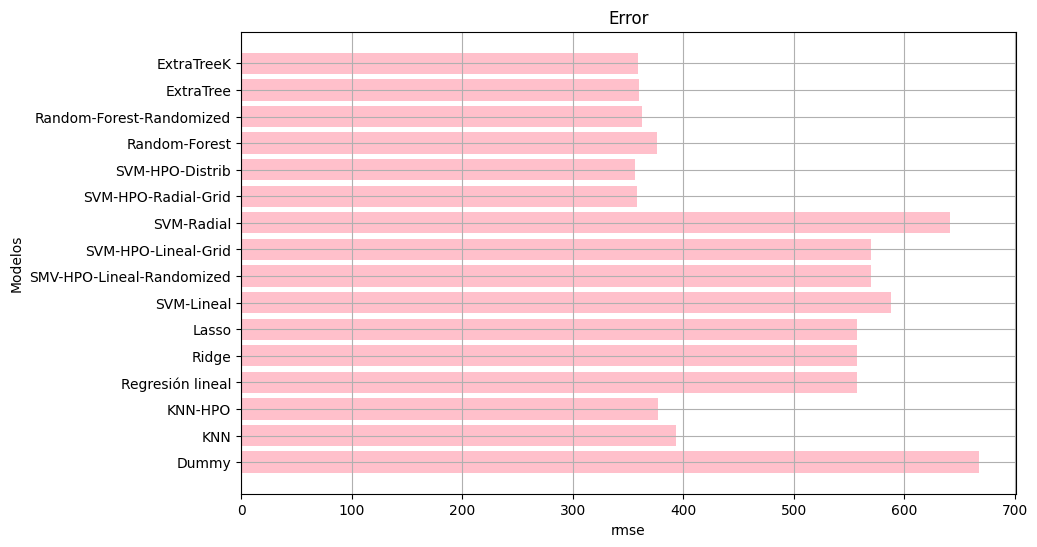

In [ ]:
import matplotlib.pyplot as plt
# print(rmse_knn, rmse_knn_random_search, rmse_value_rgln, rmse_value_ridge,rmse_value_randomized_ridge, rmse_value_lasso, rmse_value_randomized_lasso, rmse_svm_lineal, rmse_svm_lineal_randomized, rmse_svm_grid_search, rmse_svm_radial, rmse_svm_radial_randomized, rmse_radial_grid, rmse_svm_dist)
modelos = ['Dummy','KNN', 'KNN-HPO', 'Regresión lineal', 'Ridge',  'Lasso', 'SVM-Lineal', 'SMV-HPO-Lineal-Randomized', 'SVM-HPO-Lineal-Grid', 'SVM-Radial', 'SVM-HPO-Radial-Grid', 'SVM-HPO-Distrib','Random-Forest', 'Random-Forest-Randomized', 'ExtraTree','ExtraTreeK']
rmse_values = [rmse_mean_dummy, rmse_knn, rmse_knn_random_search, rmse_value_rgln, rmse_value_ridge,rmse_value_lasso, rmse_svm_lineal, rmse_svm_lineal_randomized, rmse_svm_grid_search, rmse_svm_radial,  rmse_radial_grid, rmse_svm_dist,rmse_random_forest,rmse_random_forest_randomized,rmse_extra_tree,rmse_extra_tree_selct_k]  # Tiempos de entrenamiento 

# Crear el gráfico
plt.figure(figsize=(10, 6))  
plt.barh(modelos, rmse_values, color='pink')  
plt.xlabel('rmse') 
plt.ylabel('Modelos')  
plt.title('Error')  
plt.grid(True)  
plt.show()  


····································································································································································································································································· 
Se puede observar que modelos como Ridge,Lasso y el Lineal dan valores exactamente iguales, esto es debido a que  el coeficiente de penalización apenas influye en los modelos. En todos los modelos que se realizan busqueda por hiperparametros los resultados son mejores aunque la diferencia sea bastante pequeña en algunos casos. 
·····································································································································································································································································

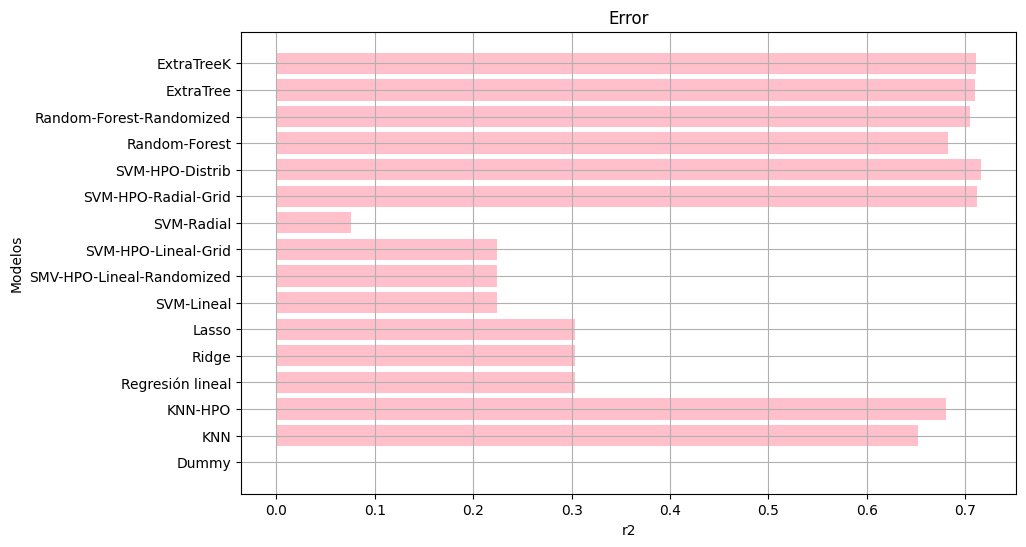

In [ ]:
import matplotlib.pyplot as plt

modelos = ['Dummy','KNN', 'KNN-HPO', 'Regresión lineal', 'Ridge',  'Lasso', 'SVM-Lineal', 'SMV-HPO-Lineal-Randomized', 'SVM-HPO-Lineal-Grid', 'SVM-Radial', 'SVM-HPO-Radial-Grid', 'SVM-HPO-Distrib','Random-Forest', 'Random-Forest-Randomized', 'ExtraTree','ExtraTreeK']
r2_values = [r2_mean_dummy, r2_knn, r2_knn_random_search, r2_rgln, r2_ridge,r2_lasso, r2_svm_lineal, r2_svm_lineal_randomized, r2_svm_grid_search, r2_svm_radial,  r2_radial_grid, r2_svm_dist ,r2_random_forest,r2_random_forest_randomized,r2_extra_tree,r2_extra_tree_selct_k]  # Tiempos de entrenamiento 

# Crear el gráfico
plt.figure(figsize=(10, 6))  
plt.barh(modelos, r2_values, color='pink')  
plt.xlabel('r2') 
plt.ylabel('Modelos')  
plt.title('Error')  
plt.grid(True)  
plt.show()  


····································································································································································································································································· 
Al ver ambas gráficas representando los distintos modelos y el valor de rmse y r2(ni aparece) que devuelven, observamos que el el peor regresor es el dummy, esto se debe a que dummy siempre predice el mismo valor (la media o la mediana) y no se ajusta muy bien a los datos, porque no utiliza ninguna información sobre las características de entrada para realizar las predicciones. 
····································································································································································································································································· 

····································································································································································································································································· 
Tras entrenar todos los modelos y comparar las métricas de cada uno de ellos, podemos llegar a la conclusión de que el mejor modelo es el SVM con distribuciones estadísticas, ya que es el que presenta el menor error rmse (356.0379189074334) y r2(0.716). Hay otros modelos como ExtraTree y Random Forest cuyos resultados de evaluación son buenos, pero al tardar más tiempo y debido a que da algo mejor el modelo SVM_distrib, finalmente es este el escogido. ·····································································································································································································································································